strategy: carry

implementation: short low interest currencies (JPY, CHF), long high interest currencies (AUD, NZD); USD actually is not as great for this strategy
how this strategy profits: taking advantage of interest rate differences between currencies; can increase profit by leveraging

main risks: if the currency is relatively volatile or the interest rates are not increasing, then the strategy risks trading at a loss (transaction costs)

variables in play: interest rate, sentiment for interest rate (growing, steady, decreasing), volatility of currency, liquidity


In [ ]:
"""
AD - australian dollar
BP - british pound
CD - canadian dollar
ED - euro dollar
JY - japan yen
SF - swiss franc
"""


'\nAD - australian dollar\nBP - british pound\nCD - canadian dollar\nED - euro dollar\nJY - japan yen\nSF - swiss franc\n'

In [ ]:
"""
Data split: Date | Open | High | Low | Close | Vol | Open Interest
Futures relevant: EC (Euro), BP (British Pound), SF (Swiss Franc), JY (Japanese Yen), ZN (10-Year Notes), AD (Australian Dollar), CD (Canadian Dollar), MP (Mexican Peso), ED (Euro Dollar), ZF (5-Year Treasury Note), ZT (2-Year Treasury Note)
"""
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Finalyze Capital Carry Strategy

/content/drive/My Drive/Finalyze Capital Carry Strategy


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

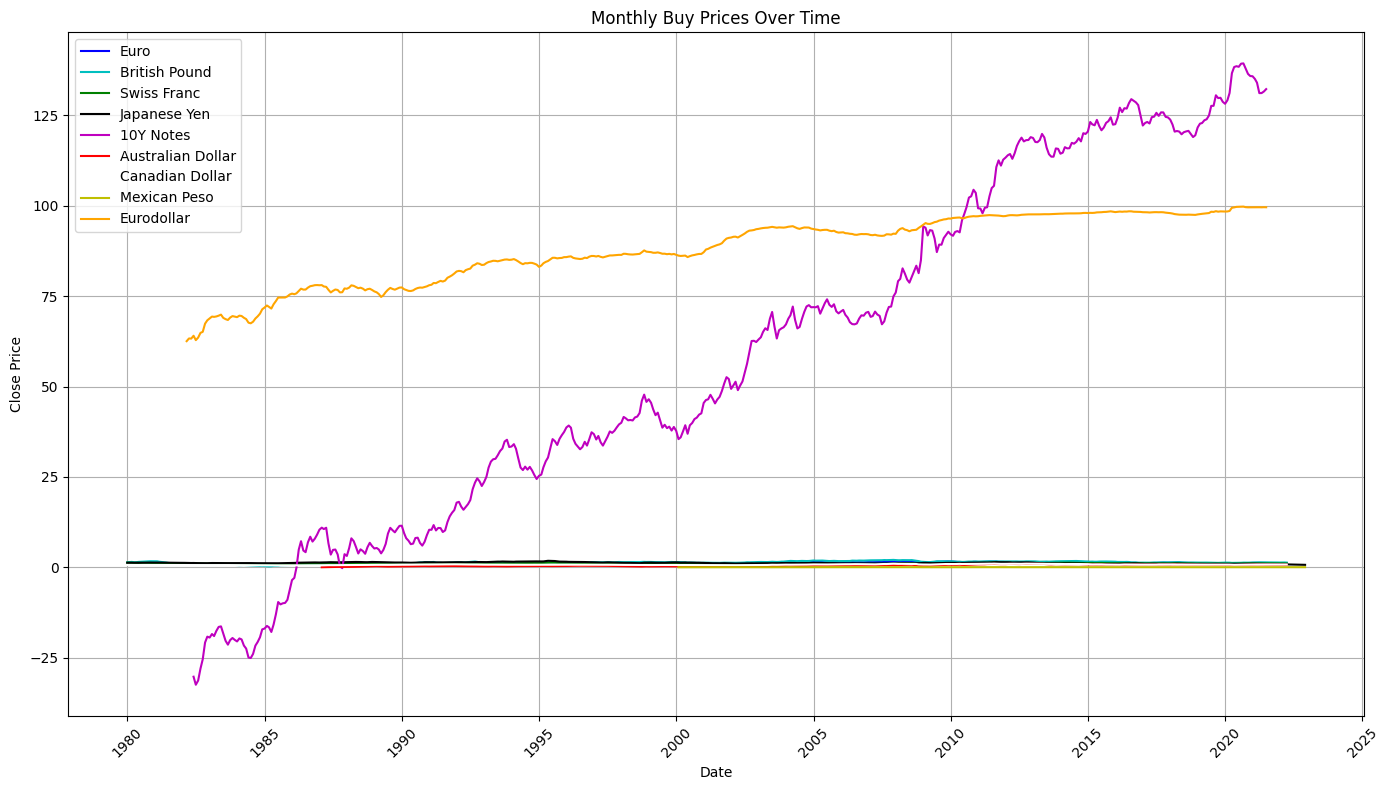

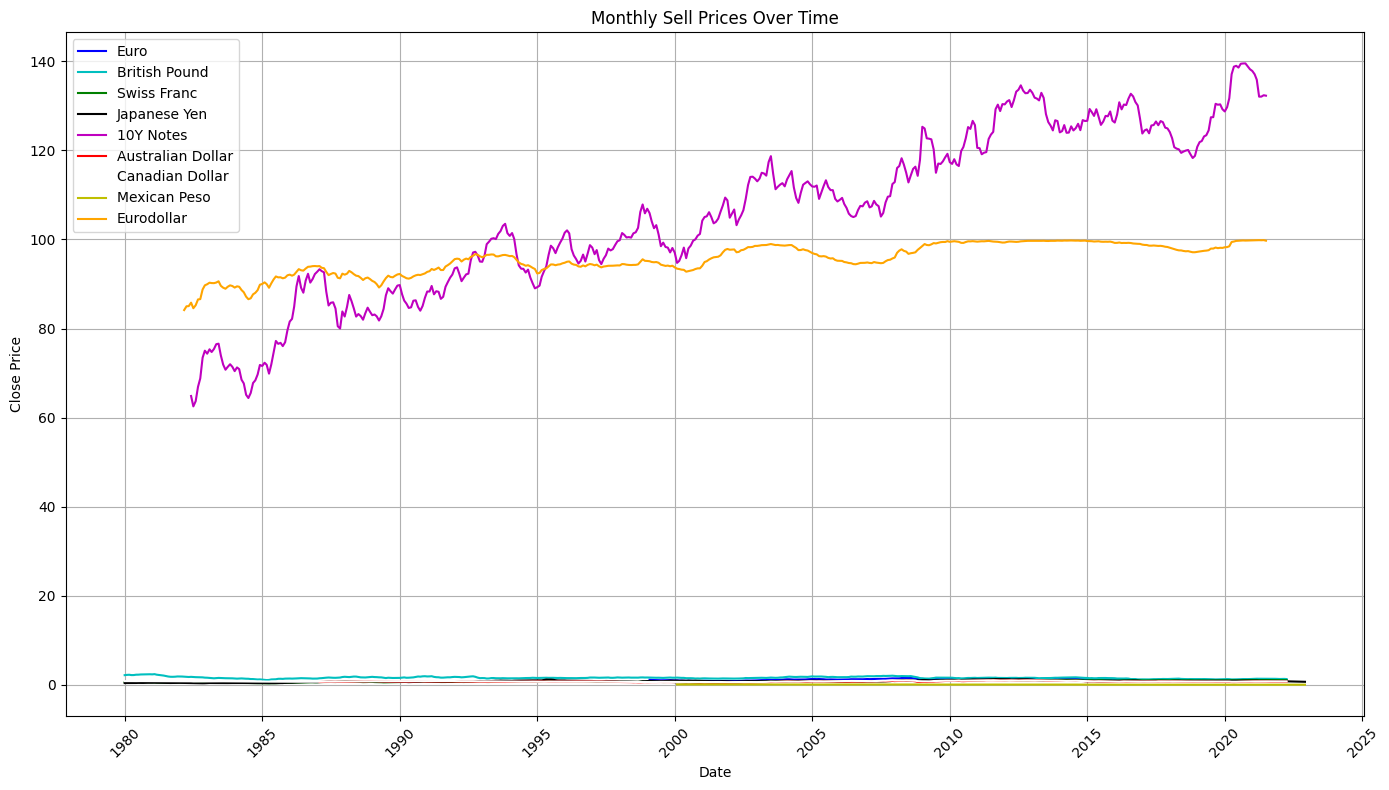

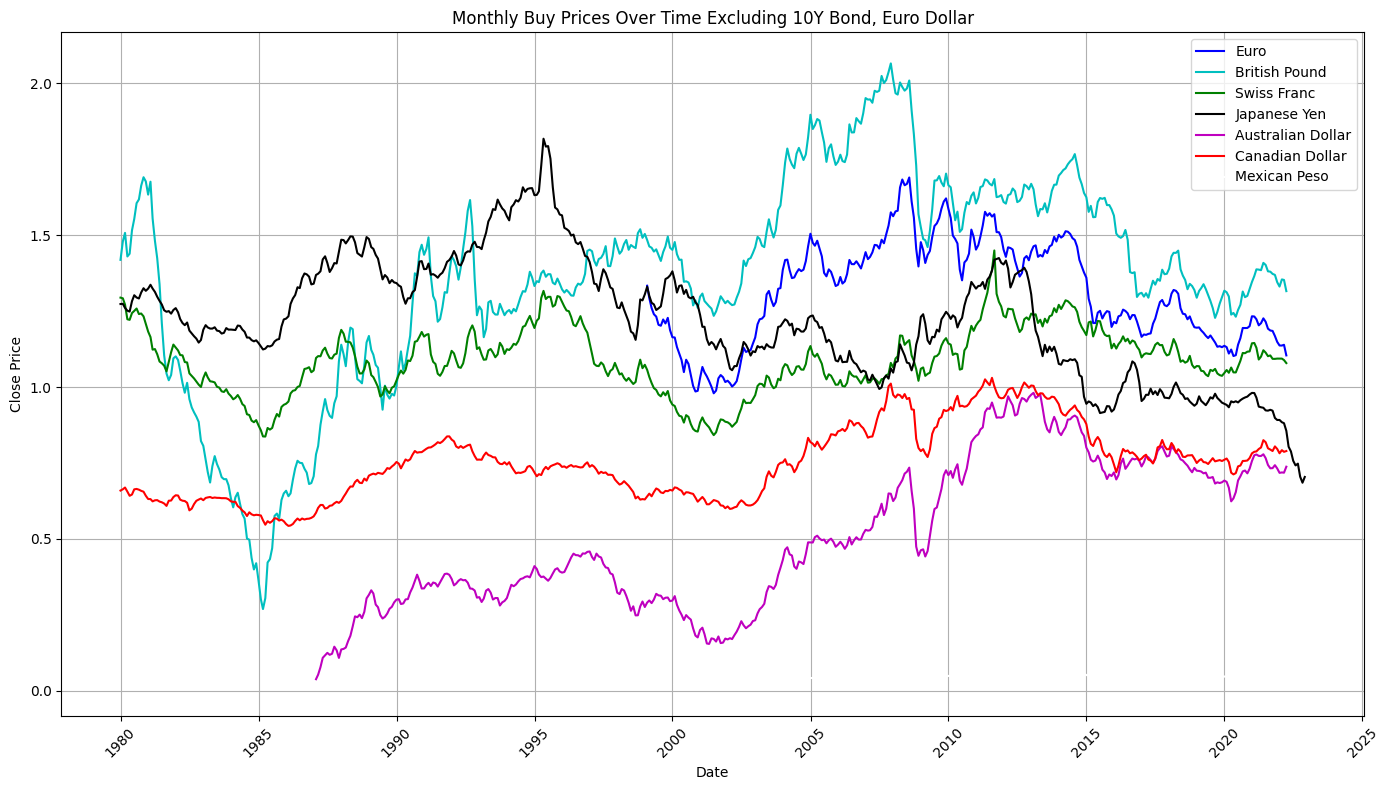

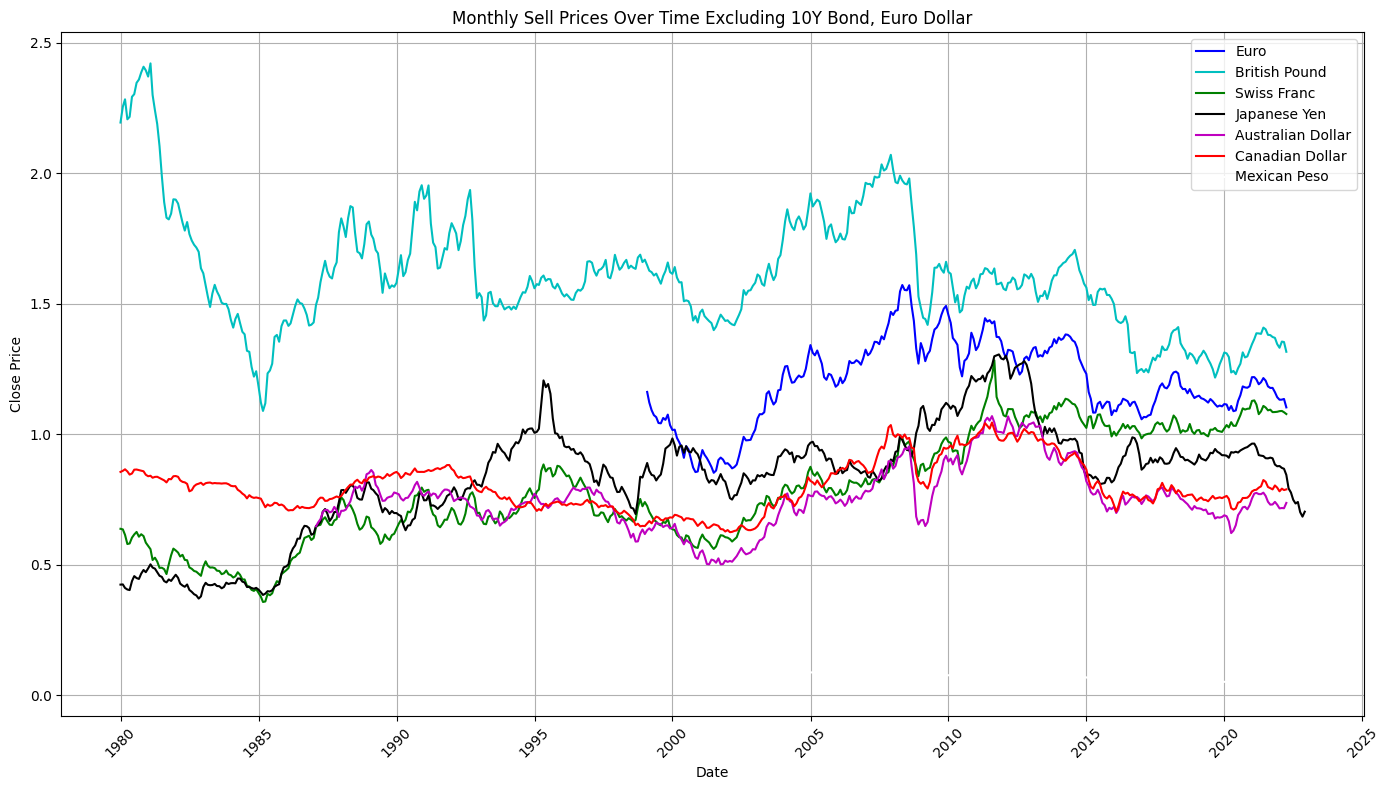

In [ ]:
# this is the price data
cols = ['Date','Open','High','Low','Close','Vol','Open Interest']
Euro_Buy = pd.read_csv("EC_CCB.csv", names=cols, header=None)
Euro_Sell = pd.read_csv("EC_CCS.csv", names=cols, header=None)
British_P_Buy = pd.read_csv("BP_CCB.csv", names=cols, header=None)
British_P_Sell = pd.read_csv("BP_CCS.csv", names=cols, header=None)
Swiss_F_Buy = pd.read_csv("SF_CCB.csv", names=cols, header=None)
Swiss_F_Sell = pd.read_csv("SF_CCS.csv", names=cols, header=None)
Japanese_Yen_Buy = pd.read_csv("JY_CCB.csv", names=cols, header=None)
Japanese_Yen_Sell = pd.read_csv("JY_CCS.csv", names=cols, header=None)
TenY_Notes_Buy = pd.read_csv("ZN_CCB.csv", names=cols, header=None)
TenY_Notes_Sell = pd.read_csv("ZN_CCS.csv", names=cols, header=None)
Australian_D_Buy = pd.read_csv("AD_CCB.csv", names=cols, header=None)
Australian_D_Sell = pd.read_csv("AD_CCS.csv", names=cols, header=None)
Canadian_D_Buy = pd.read_csv("CD_CCB.csv", names=cols, header=None)
Canadian_D_Sell = pd.read_csv("CD_CCS.csv", names=cols, header=None)
Mexican_P_Buy = pd.read_csv("MP_CCB.csv", names=cols, header=None)
Mexican_P_Sell = pd.read_csv("MP_CCS.csv", names=cols, header=None)
Eurodollar_Buy = pd.read_csv("ED_CCB.csv", names=cols, header=None)
Eurodollar_Sell = pd.read_csv("ED_CCS.csv", names=cols, header=None)

curr_buy = [Euro_Buy, British_P_Buy, Swiss_F_Buy,
            Japanese_Yen_Buy, TenY_Notes_Buy, Australian_D_Buy,
            Canadian_D_Buy, Mexican_P_Buy, Eurodollar_Buy]
curr_sell = [Euro_Sell, British_P_Sell, Swiss_F_Sell,
            Japanese_Yen_Sell, TenY_Notes_Sell, Australian_D_Sell,
            Canadian_D_Sell, Mexican_P_Sell, Eurodollar_Sell]

def convert_dates(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d').dt.strftime('%m/%d/%Y')
    return df

curr_buy = [convert_dates(df) for df in curr_buy]
curr_sell = [convert_dates(df) for df in curr_sell]

currency_names = ['Euro', 'British Pound', 'Swiss Franc', 'Japanese Yen',
                  '10Y Notes', 'Australian Dollar', 'Canadian Dollar',
                  'Mexican Peso', 'Eurodollar']

Lcurr_buy = [Euro_Buy, British_P_Buy, Swiss_F_Buy,
            Japanese_Yen_Buy, Australian_D_Buy,
            Canadian_D_Buy, Mexican_P_Buy]
Lcurr_sell = [Euro_Sell, British_P_Sell, Swiss_F_Sell,
            Japanese_Yen_Sell, Australian_D_Sell,
            Canadian_D_Sell, Mexican_P_Sell]
currency_no_E10Y = ['Euro', 'British Pound', 'Swiss Franc', 'Japanese Yen',
                  'Australian Dollar', 'Canadian Dollar',
                  'Mexican Peso']

def resample_monthly(df):
    df_copy = df.copy()
    df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%m/%d/%Y')
    df_copy.set_index('Date', inplace=True)
    df_copy = df_copy.resample('M').mean().reset_index()
    return df_copy

curr_buy_resampled = [resample_monthly(df) for df in curr_buy]
curr_sell_resampled = [resample_monthly(df) for df in curr_sell]

Lcurr_buy_resampled = [resample_monthly(df) for df in Lcurr_buy]
Lcurr_sell_resampled = [resample_monthly(df) for df in Lcurr_sell]

def plot_prices(curr_data, currency_names, title):
    colors = ['b', 'c','g','k','m','r','w','y','orange']
    plt.figure(figsize=(14, 8))

    for i, df in enumerate(curr_data):
        plt.plot(df['Date'], df['Close'], label=currency_names[i], color=colors[i])

    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_prices(curr_buy_resampled, currency_names, 'Monthly Buy Prices Over Time')

plot_prices(curr_sell_resampled, currency_names, 'Monthly Sell Prices Over Time')

plot_prices(Lcurr_buy_resampled, currency_no_E10Y, 'Monthly Buy Prices Over Time Excluding 10Y Bond, Euro Dollar')

plot_prices(Lcurr_sell_resampled, currency_no_E10Y, 'Monthly Sell Prices Over Time Excluding 10Y Bond, Euro Dollar')

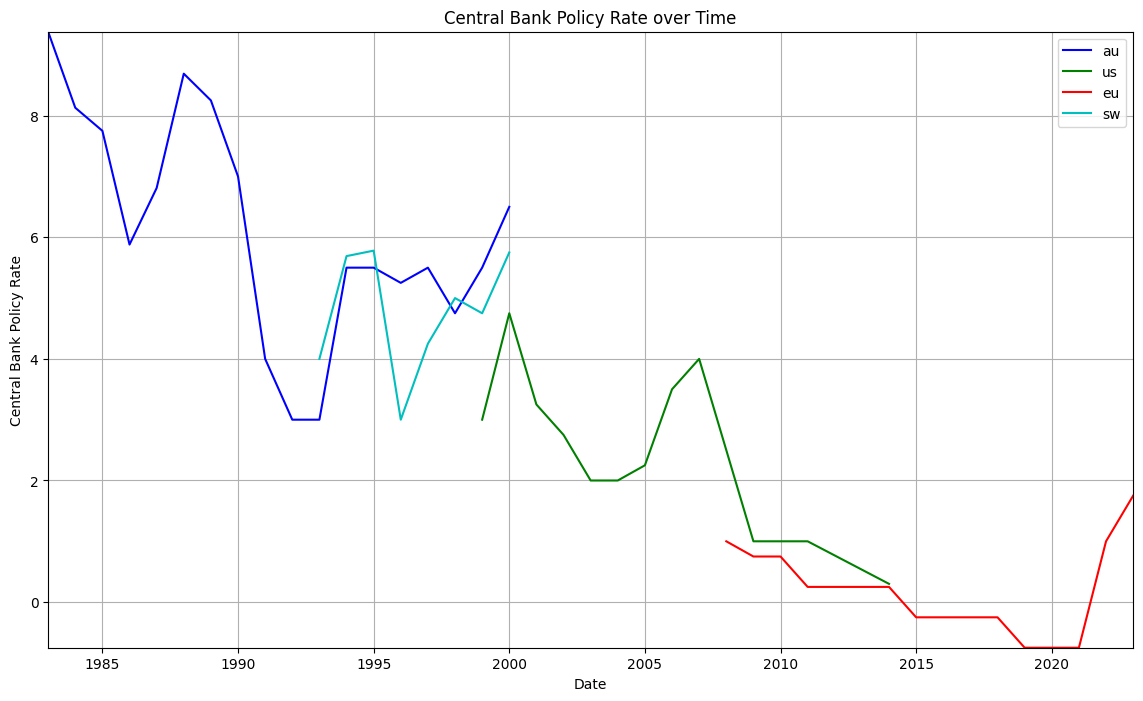

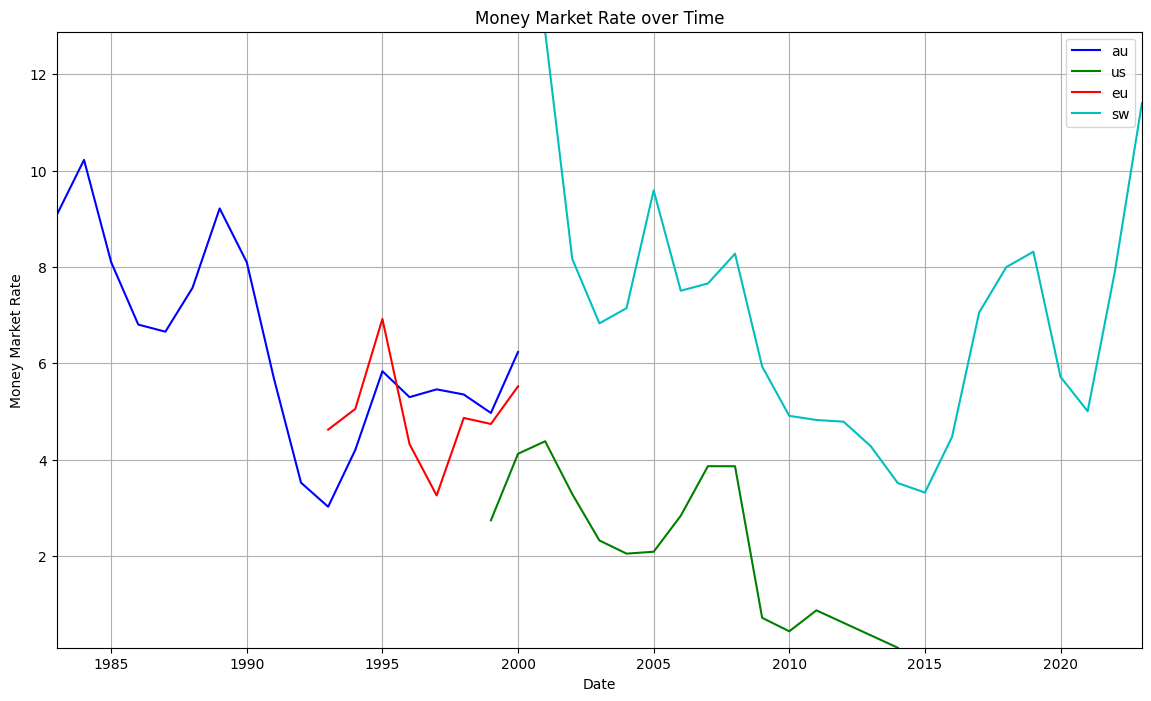

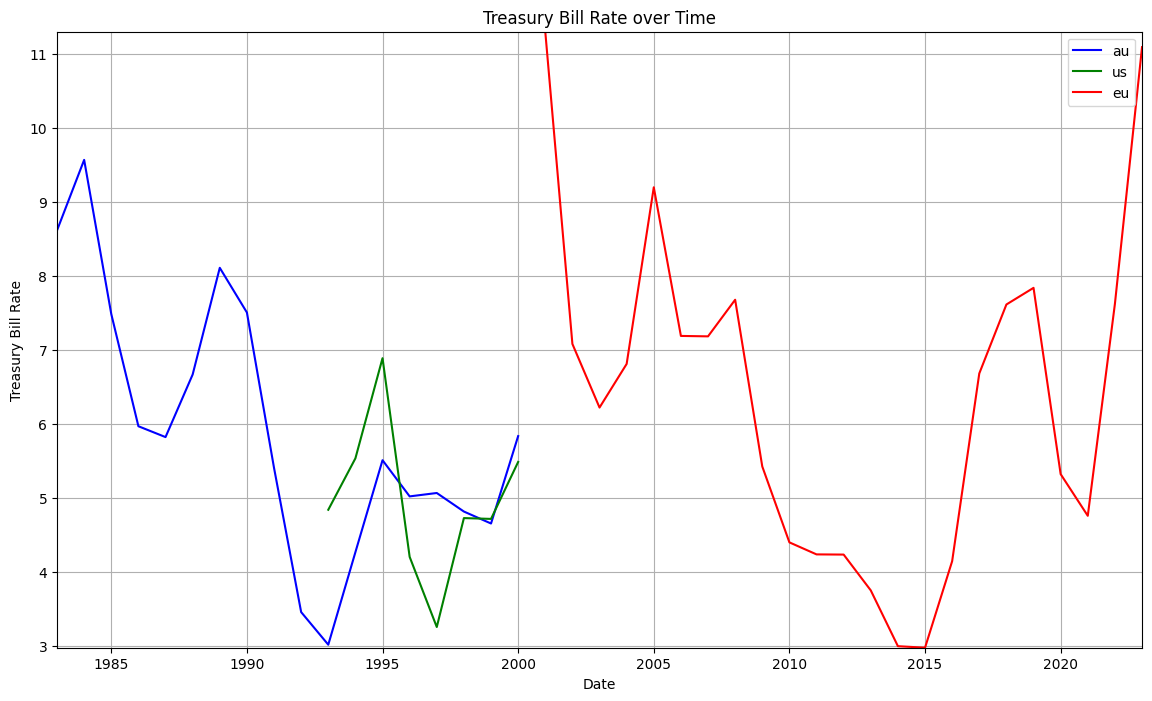

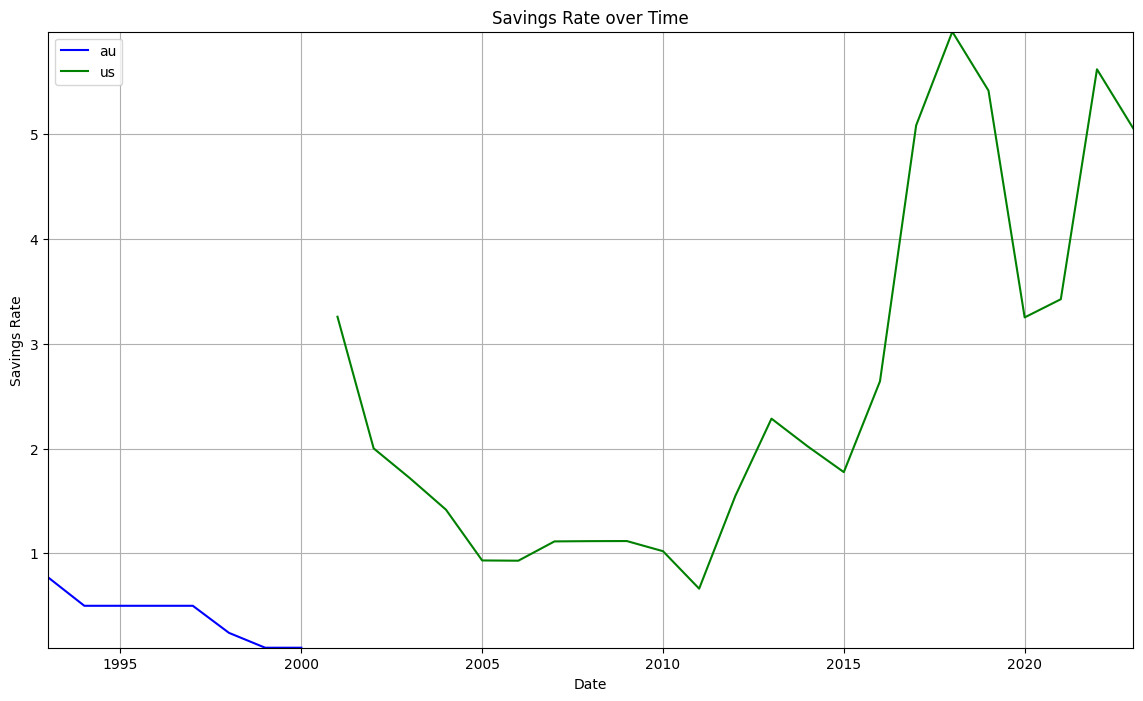

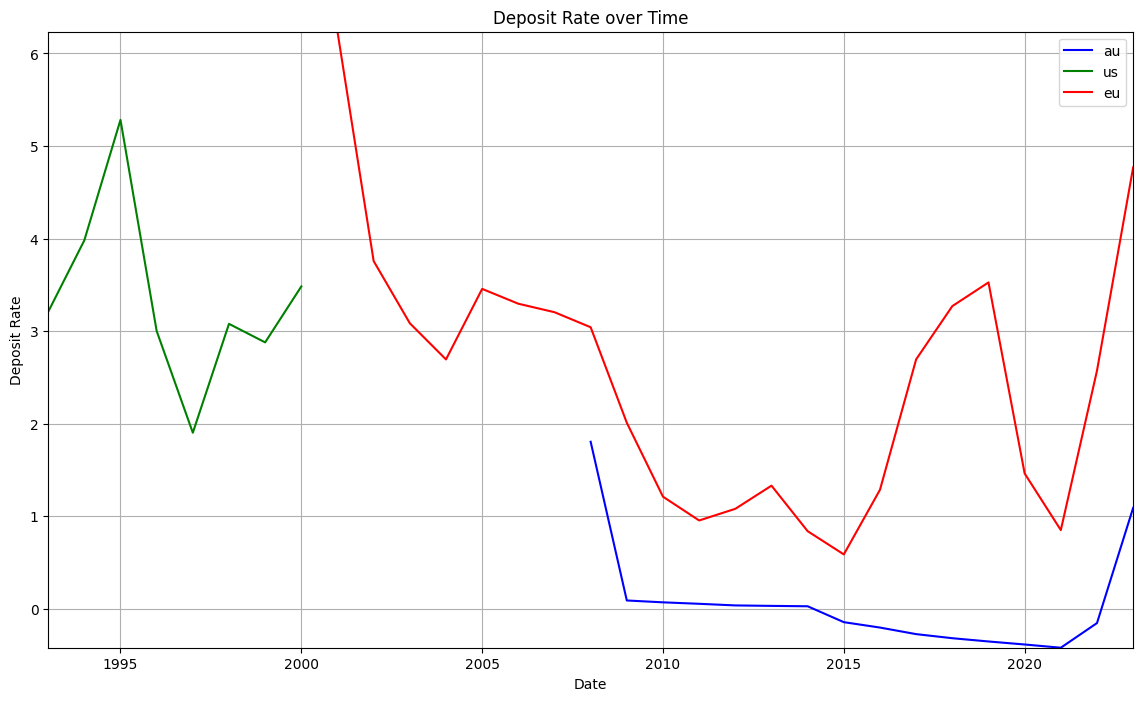

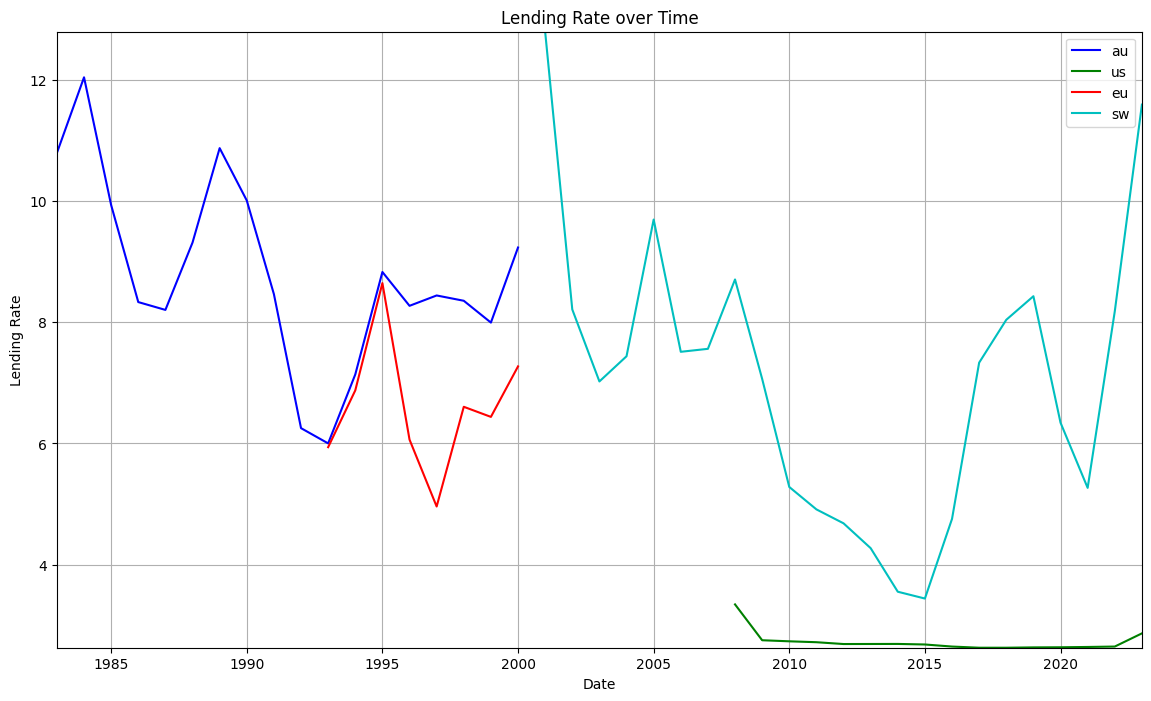

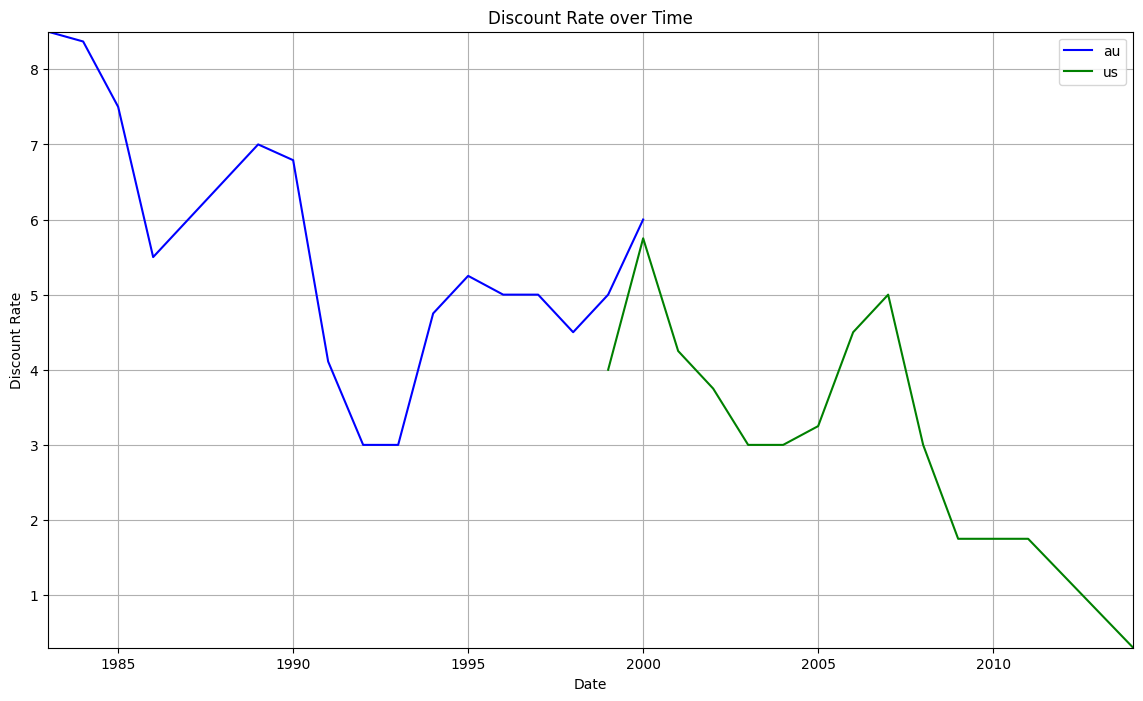

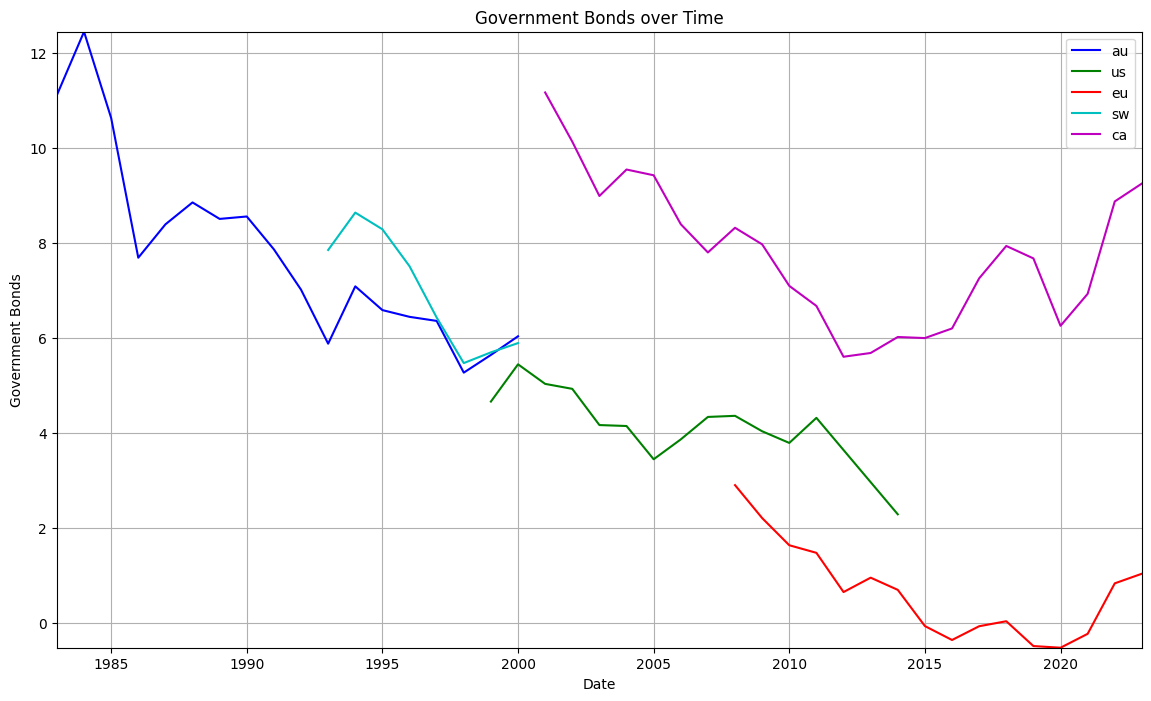

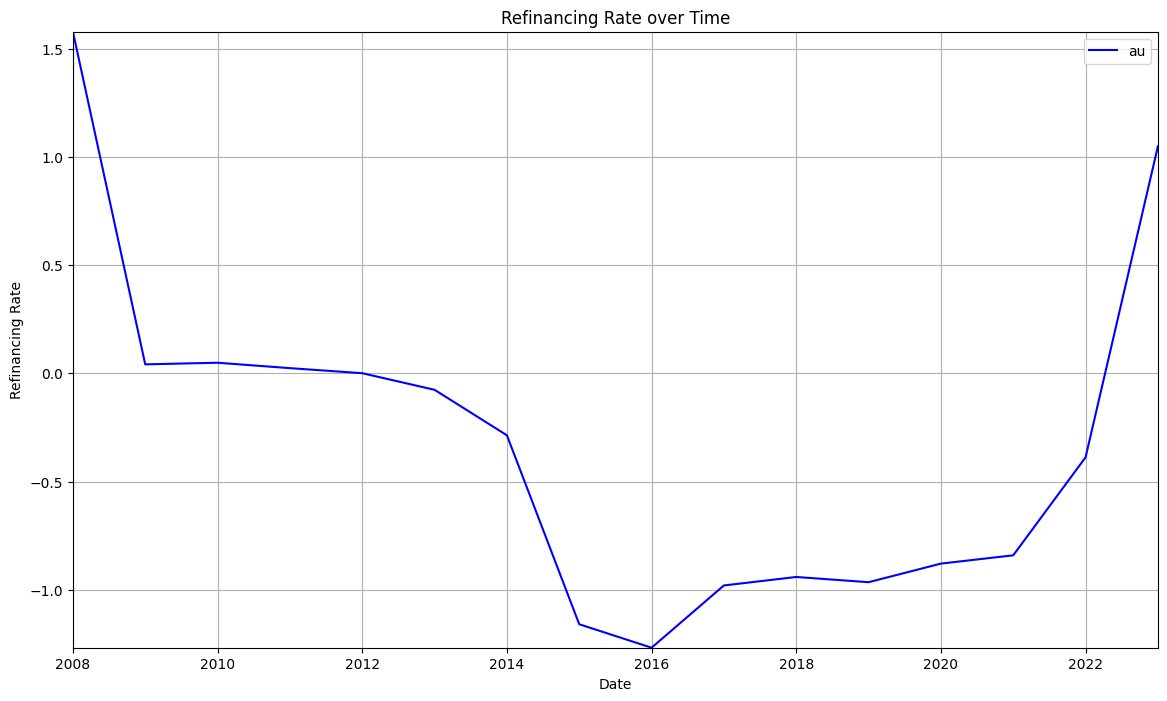

In [ ]:
Australia_interest = pd.read_excel("AUS_Interest_Rates.xlsx").transpose()
USD_interest = pd.read_excel("US_Interest_Rates.xlsx").transpose()
Euro_interest = pd.read_excel("Euro_Interest_Rates.xlsx").transpose()
Swiss_interest = pd.read_excel("Swiss_Interest_Rates.xlsx").transpose()
Canada_interest = pd.read_excel("Canada_Interest_Rates.xlsx").transpose()
Mexico_interest = pd.read_excel("Mexico_Interest_Rates.xlsx").transpose()

Australia_interest = Australia_interest[[6, 7, 8, 9, 10, 11, 12, 13]].rename(columns={6:"Date",7:"Central Bank Policy Rate",8:"Money Market Rate",
                                                 9:"Treasury Bill Rate",10:"Savings Rate",11:"Deposit Rate",12:"Lending Rate",
                                                    13:"Government Bonds"}).reset_index(drop=True).drop([0, 1, 2, 3, 4]).reset_index(drop=True)

USD_interest = USD_interest[[6, 7, 8, 9, 10, 11, 12]].rename(columns={6:"Date",7:"Central Bank Policy Rate",8:"Discount Rate",
                                                 9:"Money Market Rate",10:"Treasury Bill Rate",11:"Lending Rate",12:"Government Bonds",
                                                    }).reset_index(drop=True).drop([0, 1, 2, 3, 4]).reset_index(drop=True)

Euro_interest = Euro_interest[[6, 7, 8, 9, 10]].rename(columns={6:"Date",7:"Central Bank Policy Rate",8:"Discount Rate",
                                                 9:"Money Market Rate",10:"Government Bonds"}
                                                  ).reset_index(drop=True).drop([0, 1, 2, 3, 4]).reset_index(drop=True)

Swiss_interest = Swiss_interest[[6, 7, 8, 9, 10, 11]].rename(columns={6:"Date",7:"Central Bank Policy Rate",8:"Refinancing Rate",
                                                 9:"Deposit Rate",10:"Lending Rate", 11:"Government Bonds"}
                                                  ).reset_index(drop=True).drop([0, 1, 2, 3, 4]).reset_index(drop=True)

Canada_interest = Canada_interest[[6, 7, 8, 9, 10, 11, 12, 13]].rename(columns={6:"Date",7:"Central Bank Policy Rate",8:"Money Market Rate",
                                                 9:"Treasury Bill Rate",10:"Savings Rate",11:"Deposit Rate",12:"Lending Rate",
                                                    13:"Government Bonds"}).reset_index(drop=True).drop([0, 1, 2, 3, 4]).reset_index(drop=True)

Mexico_interest = Mexico_interest[[6, 7, 8, 9, 10, 11, 12]].rename(columns={6:"Date",7:"Money Market Rate",
                                                 8:"Treasury Bill Rate",9:"Savings Rate",10:"Deposit Rate",11:"Lending Rate",
                                                    12:"Government Bonds"}).reset_index(drop=True).drop([0, 1, 2, 3, 4]).reset_index(drop=True)

interest = [Australia_interest, USD_interest, Euro_interest,
            Swiss_interest, Canada_interest, Mexico_interest]

interest_name = ['au', 'us', 'eu', 'sw', 'ca', 'mx']
Interest_Titles=["Central Bank Policy Rate","Money Market Rate","Treasury Bill Rate","Savings Rate","Deposit Rate",
                 "Lending Rate","Discount Rate","Government Bonds","Refinancing Rate"]

def convert_dates(df):
    df['Date'] = df['Date'].astype(int)
    return df

Australia_interest = convert_dates(Australia_interest)
USD_interest = convert_dates(USD_interest)
Euro_interest = convert_dates(Euro_interest)
Swiss_interest = convert_dates(Swiss_interest)
Canada_interest = convert_dates(Canada_interest)
Mexico_interest = convert_dates(Mexico_interest)

def clean_data(df):
    df.replace('...', np.nan, inplace=True)
    df.dropna(inplace=True)
    for col in df.columns[1:]:
        df[col] = df[col].astype(float)
    return df

Australia_interest = clean_data(Australia_interest)
USD_interest = clean_data(USD_interest)
Euro_interest = clean_data(Euro_interest)
Swiss_interest = clean_data(Swiss_interest)
Canada_interest = clean_data(Canada_interest)
Mexico_interest = clean_data(Mexico_interest)

def plot_interest_rates(interest, interest_name, Interest_Titles):
    colors = ['b', 'g', 'r', 'c', 'm', 'y']

    for title in Interest_Titles:
        plt.figure(figsize=(14, 8))

        valid_dfs = [df for df in interest if title in df.columns and not df[df[title].notnull()].empty]

        for i, df in enumerate(valid_dfs):
            plt.plot(df['Date'], df[title], label=interest_name[i], color=colors[i])

        plt.xlabel('Date')
        plt.ylabel(title)
        plt.title(f'{title} over Time')
        plt.legend()
        plt.grid(True)

        # Ensure axis limits are set based on valid data
        if valid_dfs:
            x_min = min([df['Date'].dropna().min() for df in valid_dfs if np.isfinite(df['Date'].dropna()).all()])
            x_max = max([df['Date'].dropna().max() for df in valid_dfs if np.isfinite(df['Date'].dropna()).all()])
            y_min = min([df[title].dropna().min() for df in valid_dfs if np.isfinite(df[title].dropna()).all()])
            y_max = max([df[title].dropna().max() for df in valid_dfs if np.isfinite(df[title].dropna()).all()])

            plt.xlim(float(x_min), float(x_max))
            plt.ylim(float(y_min), float(y_max))

        plt.show()

plot_interest_rates(interest, interest_name, Interest_Titles)

Based on these graphs, the main currencies we want to focus on trading on due to comparableness are: Euro, British Pound, Swiss Franc, Japanese Yen, Australian Dollar, Canadian Dollar, Mexican Peso

Begin cleaning data for bond interest rates for each country

In [ ]:
#US - usd
US_B = pd.read_csv("interest rates/US_bond.csv").drop([0,1,2,3,4]).reset_index().drop(columns="index").rename(
    columns={'Series Description':'Date',
             'Market yield on U.S. Treasury securities at 1-month  constant maturity, quoted on investment basis': 'US1M_B',
             'Market yield on U.S. Treasury securities at 3-month  constant maturity, quoted on investment basis': 'US3M_B',
             'Market yield on U.S. Treasury securities at 6-month  constant maturity, quoted on investment basis': 'US6M_B',
             'Market yield on U.S. Treasury securities at 1-year  constant maturity, quoted on investment basis': 'US1Y_B',
             'Market yield on U.S. Treasury securities at 2-year  constant maturity, quoted on investment basis': 'US2Y_B',
             'Market yield on U.S. Treasury securities at 3-year  constant maturity, quoted on investment basis': 'US3Y_B',
             'Market yield on U.S. Treasury securities at 5-year  constant maturity, quoted on investment basis': 'US5Y_B',
             'Market yield on U.S. Treasury securities at 7-year  constant maturity, quoted on investment basis': 'US7Y_B',
             'Market yield on U.S. Treasury securities at 10-year  constant maturity, quoted on investment basis': 'US10Y_B',
             'Market yield on U.S. Treasury securities at 20-year  constant maturity, quoted on investment basis': 'US20Y_B',
             'Market yield on U.S. Treasury securities at 30-year  constant maturity, quoted on investment basis': 'US30Y_B'})

US_B['Date'] = pd.to_datetime(US_B['Date']).dt.date

US_B.head(15)

,Date,US1M_B,US3M_B,US6M_B,US1Y_B,US2Y_B,US3Y_B,US5Y_B,US7Y_B,US10Y_B,US20Y_B,US30Y_B
0,1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1,1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
2,1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
3,1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
4,1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN
5,1962-01-09,NaN,NaN,NaN,3.32,NaN,3.74,3.93,NaN,4.05,4.08,NaN
6,1962-01-10,NaN,NaN,NaN,3.33,NaN,3.75,3.94,NaN,4.07,4.09,NaN
7,1962-01-11,NaN,NaN,NaN,3.33,NaN,3.77,3.94,NaN,4.08,4.08,NaN
8,1962-01-12,NaN,NaN,NaN,3.30,NaN,3.76,3.95,NaN,4.08,4.09,NaN
9,1962-01-15,NaN,NaN,NaN,3.32,NaN,3.79,3.96,NaN,4.10,4.10,NaN


In [ ]:
#Switzerland - SW
SW_B = pd.read_excel("interest rates/swiss_interest.xls", sheet_name="3.2_L").drop([0,1,2,3]).reset_index().drop(columns="index").rename(
    columns={'Renditen von Obligationen / Rendements d\'obligations / Yields on bonds':'Date',
             'Unnamed: 1': 'SW1Y_B',
             'Unnamed: 2': 'SW2Y_B',
             'Unnamed: 3': 'SW3Y_B',
             'Unnamed: 4': 'SW4Y_B',
             'Unnamed: 5': 'SW5Y_B',
             'Unnamed: 6': 'SW6Y_B',
             'Unnamed: 7': 'SW7Y_B',
             'Unnamed: 8': 'SW8Y_B',
             'Unnamed: 9': 'SW9Y_B',
             'Unnamed: 10': 'SW10Y_B',
             'Unnamed: 11': 'SW15Y_B',
             'Unnamed: 12': 'SW20Y_B',
             'Unnamed: 13': 'SW30Y_B'}).drop([5173,5174,5175,5176,5177,5178]).replace(['.'],['NaN'])

SW_B['Date'] = pd.to_datetime(SW_B['Date']).dt.date

SW_B.head(15)

,Date,SW1Y_B,SW2Y_B,SW3Y_B,SW4Y_B,SW5Y_B,SW6Y_B,SW7Y_B,SW8Y_B,SW9Y_B,SW10Y_B,SW15Y_B,SW20Y_B,SW30Y_B
0,1988-01-04,3.448,3.691,3.749,3.785,3.823,3.862,3.902,3.942,3.98,4.015,4.148,4.229,NaN
1,1988-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1988-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1988-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1988-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1988-01-11,3.442,3.72,3.783,3.816,3.847,3.879,3.913,3.948,3.982,4.015,4.147,4.232,NaN
6,1988-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1988-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1988-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1988-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Japan - JP
JP_B = pd.read_csv("interest rates/japanese_interest.csv", header=1).rename(
    columns={'1Y': 'JP1Y_B',
             '2Y': 'JP2Y_B',
             '3Y': 'JP3Y_B',
             '4Y': 'JP4Y_B',
             '5Y': 'JP5Y_B',
             '6Y': 'JP6Y_B',
             '7Y': 'JP7Y_B',
             '8Y': 'JP8Y_B',
             '9Y': 'JP9Y_B',
             '10Y': 'JP10Y_B',
             '15Y': 'JP15Y_B',
             '20Y': 'JP20Y_B',
             '25Y': 'JP25Y_B',
             '30Y': 'JP30Y_B',
             '40Y': 'JP40Y_B',}).replace(['-'],['NaN'])

JP_B['Date'] = pd.to_datetime(US_B['Date']).dt.date

JP_B.head(15)

,Date,JP1Y_B,JP2Y_B,JP3Y_B,JP4Y_B,JP5Y_B,JP6Y_B,JP7Y_B,JP8Y_B,JP9Y_B,JP10Y_B,JP15Y_B,JP20Y_B,JP25Y_B,JP30Y_B,JP40Y_B
0,1962-01-02,10.327,9.362,8.83,8.515,8.348,8.290,8.240,8.121,8.127,NaN,NaN,NaN,NaN,NaN,NaN
1,1962-01-03,10.333,9.364,8.831,8.516,8.348,8.290,8.240,8.121,8.127,NaN,NaN,NaN,NaN,NaN,NaN
2,1962-01-04,10.34,9.366,8.832,8.516,8.348,8.290,8.240,8.122,8.128,NaN,NaN,NaN,NaN,NaN,NaN
3,1962-01-05,10.347,9.367,8.833,8.517,8.349,8.290,8.240,8.122,8.128,NaN,NaN,NaN,NaN,NaN,NaN
4,1962-01-08,10.354,9.369,8.834,8.518,8.349,8.291,8.240,8.122,8.129,NaN,NaN,NaN,NaN,NaN,NaN
5,1962-01-09,10.368,9.373,8.836,8.519,8.350,8.291,8.240,8.122,8.130,NaN,NaN,NaN,NaN,NaN,NaN
6,1962-01-10,10.374,9.374,8.837,8.519,8.354,8.298,8.244,8.119,8.201,NaN,NaN,NaN,NaN,NaN,NaN
7,1962-01-11,10.381,9.376,8.838,8.520,8.354,8.298,8.244,8.119,8.202,NaN,NaN,NaN,NaN,NaN,NaN
8,1962-01-12,10.388,9.378,8.839,8.520,8.354,8.298,8.244,8.120,8.203,NaN,NaN,NaN,NaN,NaN,NaN
9,1962-01-15,10.395,9.379,8.84,8.521,8.355,8.298,8.244,8.120,8.204,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Australia - AU
AU_B = pd.read_excel("interest rates/australian_interest.xls", sheet_name="Data").drop([0,1,2,3,4,5,6,7,8,9]).reset_index().drop(columns=["index","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8"]).rename(
    columns={'F2  CAPITAL MARKET YIELDS - GOVERNMENT BONDS':'Date',
             'Unnamed: 1': 'AU2Y_B',
             'Unnamed: 2': 'AU3Y_B',
             'Unnamed: 3': 'AU5Y_B',
             'Unnamed: 4': 'AU10Y_B'})

AU_B['Date'] = pd.to_datetime(AU_B['Date']).dt.date

AU_B.head(15)

,Date,AU2Y_B,AU3Y_B,AU5Y_B,AU10Y_B
0,1995-01-03,10.23,10.22,10.17,10.06
1,1995-01-04,10.31,10.32,10.28,10.18
2,1995-01-05,10.35,10.37,10.34,10.32
3,1995-01-06,10.34,10.37,10.36,10.36
4,1995-01-09,10.3,10.36,10.37,10.43
5,1995-01-10,10.28,10.38,10.4,10.42
6,1995-01-11,10.28,10.38,10.39,10.37
7,1995-01-12,10.2,10.3,10.31,10.3
8,1995-01-13,10.26,10.36,10.38,10.41
9,1995-01-16,10.05,10.16,10.21,10.29


In [ ]:
#Canada - CA
from functools import reduce
CA_B = pd.read_csv("interest rates/canada_interest.csv").drop(columns=['GEO','DGUID',
                                                                       'SCALAR_FACTOR',
                                                                       'SCALAR_ID',
                                                                       'VECTOR',
                                                                       'COORDINATE',
                                                                       'UOM',
                                                                       'UOM_ID',
                                                                       'STATUS',
                                                                       'SYMBOL',
                                                                       'TERMINATED',
                                                                       'DECIMALS'])

CA2Y_Bdf = CA_B.loc[CA_B['Financial market statistics'] == 'Government of Canada benchmark bond yields, 2 year'].rename(columns={'VALUE':'CA2Y_B'}).drop(columns='Financial market statistics')
CA3Y_Bdf = CA_B.loc[CA_B['Financial market statistics'] == 'Government of Canada benchmark bond yields, 3 year'].rename(columns={'VALUE':'CA3Y_B'}).drop(columns='Financial market statistics')
CA5Y_Bdf = CA_B.loc[CA_B['Financial market statistics'] == 'Government of Canada benchmark bond yields, 5 year'].rename(columns={'VALUE':'CA5Y_B'}).drop(columns='Financial market statistics')
CA7Y_Bdf = CA_B.loc[CA_B['Financial market statistics'] == 'Government of Canada benchmark bond yields, 7 year'].rename(columns={'VALUE':'CA7Y_B'}).drop(columns='Financial market statistics')
CA10Y_Bdf = CA_B.loc[CA_B['Financial market statistics'] == 'Government of Canada benchmark bond yields, 10 year'].rename(columns={'VALUE':'CA10Y_B'}).drop(columns='Financial market statistics')
CA1M_Bdf = CA_B.loc[CA_B['Financial market statistics'] == 'Treasury Bills, 1-month'].rename(columns={'VALUE':'CA1M_B'}).drop(columns='Financial market statistics')
CA2M_Bdf = CA_B.loc[CA_B['Financial market statistics'] == 'Treasury Bills, 2-month'].rename(columns={'VALUE':'CA2M_B'}).drop(columns='Financial market statistics')
CA3M_Bdf = CA_B.loc[CA_B['Financial market statistics'] == 'Treasury Bills, 3-month'].rename(columns={'VALUE':'CA3M_B'}).drop(columns='Financial market statistics')
CA6M_Bdf = CA_B.loc[CA_B['Financial market statistics'] == 'Treasury Bills, 6-month'].rename(columns={'VALUE':'CA6M_B'}).drop(columns='Financial market statistics')
CA1Y_Bdf = CA_B.loc[CA_B['Financial market statistics'] == 'Treasury Bills, 1-year'].rename(columns={'VALUE':'CA1Y_B'}).drop(columns='Financial market statistics')

CA_dataframes = [CA2Y_Bdf, CA3Y_Bdf, CA5Y_Bdf, CA7Y_Bdf, CA10Y_Bdf, CA1M_Bdf, CA2M_Bdf, CA3M_Bdf, CA6M_Bdf, CA1Y_Bdf]

CA_B = reduce(lambda  left,right: pd.merge(left,right,on=['REF_DATE'],
                                            how='left'), CA_dataframes).rename(columns={'REF_DATE':'Date'})
#CA_B['Date'] = pd.to_datetime(CA_B['Date']).dt.date

CA_B.head(10)

<ipython-input-13-6cddef3b1860>:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  CA_B = pd.read_csv("interest rates/canada_interest.csv").drop(columns=['GEO','DGUID',


,Date,CA2Y_B,CA3Y_B,CA5Y_B,CA7Y_B,CA10Y_B,CA1M_B,CA2M_B,CA3M_B,CA6M_B,CA1Y_B
0,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-02,NaN,NaN,NaN,NaN,NaN,7.77,7.79,7.81,NaN,NaN
2,1970-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-01-05,NaN,NaN,NaN,NaN,NaN,7.76,7.78,7.80,NaN,NaN
5,1970-01-06,NaN,NaN,NaN,NaN,NaN,7.77,7.79,7.81,NaN,NaN
6,1970-01-07,NaN,NaN,NaN,NaN,NaN,7.75,7.77,7.79,NaN,NaN
7,1970-01-08,NaN,NaN,NaN,NaN,NaN,7.79,7.81,7.83,NaN,NaN
8,1970-01-09,NaN,NaN,NaN,NaN,NaN,7.79,7.81,7.83,NaN,NaN
9,1970-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#mexico - MX
#great britain - GB

In [ ]:
bond_data = [US_B, SW_B, JP_B, AU_B, CA_B]
freq = {}
for i in bond_data:
  titles = i.keys()
  print(titles)
  titles_chopped = [j[2:] for j in titles[1:]]
  for x in titles_chopped:
    if x not in freq:
      freq[x] = 1
    else:
      freq[x] += 1

print(freq)


removal = []
print('\n\n\nAlert: only one value in comparison dict for:')
for i in freq.keys():
  if freq[i] == 1:
    print(i)
    removal += [i]

Index(['Date', 'US1M_B', 'US3M_B', 'US6M_B', 'US1Y_B', 'US2Y_B', 'US3Y_B',
       'US5Y_B', 'US7Y_B', 'US10Y_B', 'US20Y_B', 'US30Y_B'],
      dtype='object')
Index(['Date', 'SW1Y_B', 'SW2Y_B', 'SW3Y_B', 'SW4Y_B', 'SW5Y_B', 'SW6Y_B',
       'SW7Y_B', 'SW8Y_B', 'SW9Y_B', 'SW10Y_B', 'SW15Y_B', 'SW20Y_B',
       'SW30Y_B'],
      dtype='object')
Index(['Date', 'JP1Y_B', 'JP2Y_B', 'JP3Y_B', 'JP4Y_B', 'JP5Y_B', 'JP6Y_B',
       'JP7Y_B', 'JP8Y_B', 'JP9Y_B', 'JP10Y_B', 'JP15Y_B', 'JP20Y_B',
       'JP25Y_B', 'JP30Y_B', 'JP40Y_B'],
      dtype='object')
Index(['Date', 'AU2Y_B', 'AU3Y_B', 'AU5Y_B', 'AU10Y_B'], dtype='object')
Index(['Date', 'CA2Y_B', 'CA3Y_B', 'CA5Y_B', 'CA7Y_B', 'CA10Y_B', 'CA1M_B',
       'CA2M_B', 'CA3M_B', 'CA6M_B', 'CA1Y_B'],
      dtype='object')
{'1M_B': 2, '3M_B': 2, '6M_B': 2, '1Y_B': 4, '2Y_B': 5, '3Y_B': 5, '5Y_B': 5, '7Y_B': 4, '10Y_B': 5, '20Y_B': 3, '30Y_B': 3, '4Y_B': 2, '6Y_B': 2, '8Y_B': 2, '9Y_B': 2, '15Y_B': 2, '25Y_B': 1, '40Y_B': 1, '2M_B': 1}



Alert: onl

In [ ]:
bond_data[2] = bond_data[2].drop(columns=['JP25Y_B','JP40Y_B'])
bond_data[4] = bond_data[4].drop(columns=['CA2M_B'])

for i in bond_data:
  titles = i.keys()
  print(titles)

Index(['Date', 'US1M_B', 'US3M_B', 'US6M_B', 'US1Y_B', 'US2Y_B', 'US3Y_B',
       'US5Y_B', 'US7Y_B', 'US10Y_B', 'US20Y_B', 'US30Y_B'],
      dtype='object')
Index(['Date', 'SW1Y_B', 'SW2Y_B', 'SW3Y_B', 'SW4Y_B', 'SW5Y_B', 'SW6Y_B',
       'SW7Y_B', 'SW8Y_B', 'SW9Y_B', 'SW10Y_B', 'SW15Y_B', 'SW20Y_B',
       'SW30Y_B'],
      dtype='object')
Index(['Date', 'JP1Y_B', 'JP2Y_B', 'JP3Y_B', 'JP4Y_B', 'JP5Y_B', 'JP6Y_B',
       'JP7Y_B', 'JP8Y_B', 'JP9Y_B', 'JP10Y_B', 'JP15Y_B', 'JP20Y_B',
       'JP30Y_B'],
      dtype='object')
Index(['Date', 'AU2Y_B', 'AU3Y_B', 'AU5Y_B', 'AU10Y_B'], dtype='object')
Index(['Date', 'CA2Y_B', 'CA3Y_B', 'CA5Y_B', 'CA7Y_B', 'CA10Y_B', 'CA1M_B',
       'CA3M_B', 'CA6M_B', 'CA1Y_B'],
      dtype='object')


In [ ]:
dates = []
for i in bond_data:
  dates += [i['Date'].max()]
  dates += [i['Date'].min()]
  print(i['Date'].max())
  print(i['Date'].min())
  print('\n')


2024-07-25
1962-01-02


2007-10-31
1988-01-04


2010-11-30
1962-01-02


2013-06-28
1995-01-03


2024-07-26
1970-01-01




In [ ]:
from datetime import date, timedelta


dates = []
start_date = date(1962, 1, 2)
end_date = date(2024, 7, 26)

delta = end_date - start_date

for i in range(delta.days + 1):
    day = start_date + timedelta(days=i)
    dates += [day]

print(len(dates))

22852


In [ ]:
all_bonds = pd.DataFrame({'Date':dates})
all_bonds.head(10)

,Date
0,1962-01-02
1,1962-01-03
2,1962-01-04
3,1962-01-05
4,1962-01-06
5,1962-01-07
6,1962-01-08
7,1962-01-09
8,1962-01-10
9,1962-01-11


In [ ]:
for i in bond_data:
  all_bonds = pd.merge(all_bonds, i, on='Date', how='left')

all_bonds.replace('NaN', np.nan, inplace=True)

all_bonds.to_csv('all_bond_data.csv', index=False)
all_bonds.head(10)

,Date,US1M_B,US3M_B,US6M_B,US1Y_B,US2Y_B,US3Y_B,US5Y_B,US7Y_B,US10Y_B,...,AU10Y_B,CA2Y_B,CA3Y_B,CA5Y_B,CA7Y_B,CA10Y_B,CA1M_B,CA3M_B,CA6M_B,CA1Y_B
0,1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1962-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1962-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1962-01-09,NaN,NaN,NaN,3.32,NaN,3.74,3.93,NaN,4.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1962-01-10,NaN,NaN,NaN,3.33,NaN,3.75,3.94,NaN,4.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1962-01-11,NaN,NaN,NaN,3.33,NaN,3.77,3.94,NaN,4.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
all_bonds.keys()

Index(['Date', 'US1M_B', 'US3M_B', 'US6M_B', 'US1Y_B', 'US2Y_B', 'US3Y_B',
       'US5Y_B', 'US7Y_B', 'US10Y_B', 'US20Y_B', 'US30Y_B', 'SW1Y_B', 'SW2Y_B',
       'SW3Y_B', 'SW4Y_B', 'SW5Y_B', 'SW6Y_B', 'SW7Y_B', 'SW8Y_B', 'SW9Y_B',
       'SW10Y_B', 'SW15Y_B', 'SW20Y_B', 'SW30Y_B', 'JP1Y_B', 'JP2Y_B',
       'JP3Y_B', 'JP4Y_B', 'JP5Y_B', 'JP6Y_B', 'JP7Y_B', 'JP8Y_B', 'JP9Y_B',
       'JP10Y_B', 'JP15Y_B', 'JP20Y_B', 'JP30Y_B', 'AU2Y_B', 'AU3Y_B',
       'AU5Y_B', 'AU10Y_B', 'CA2Y_B', 'CA3Y_B', 'CA5Y_B', 'CA7Y_B', 'CA10Y_B',
       'CA1M_B', 'CA3M_B', 'CA6M_B', 'CA1Y_B'],
      dtype='object')

In [ ]:
bond_lengths = set(col[2:-2] for col in all_bonds.columns if col != 'Date')
indiv_bonds = {}

for bond_length in bond_lengths:
    columns = ['Date'] + [col for col in all_bonds.columns if col[2:-2] == bond_length]
    t_df = all_bonds[columns].copy()
    t_df.columns = ['Date'] + [col[:2] for col in t_df.columns if col != 'Date']
    indiv_bonds[f'{bond_length}_B'] = t_df

In [ ]:
for i in indiv_bonds.keys():
  print(i, indiv_bonds[i].keys())

7Y_B Index(['Date', 'US', 'SW', 'JP', 'CA'], dtype='object')
6Y_B Index(['Date', 'SW', 'JP'], dtype='object')
9Y_B Index(['Date', 'SW', 'JP'], dtype='object')
10Y_B Index(['Date', 'US', 'SW', 'JP', 'AU', 'CA'], dtype='object')
8Y_B Index(['Date', 'SW', 'JP'], dtype='object')
1M_B Index(['Date', 'US', 'CA'], dtype='object')
5Y_B Index(['Date', 'US', 'SW', 'JP', 'AU', 'CA'], dtype='object')
4Y_B Index(['Date', 'SW', 'JP'], dtype='object')
30Y_B Index(['Date', 'US', 'SW', 'JP'], dtype='object')
3M_B Index(['Date', 'US', 'CA'], dtype='object')
20Y_B Index(['Date', 'US', 'SW', 'JP'], dtype='object')
15Y_B Index(['Date', 'SW', 'JP'], dtype='object')
6M_B Index(['Date', 'US', 'CA'], dtype='object')
2Y_B Index(['Date', 'US', 'SW', 'JP', 'AU', 'CA'], dtype='object')
1Y_B Index(['Date', 'US', 'SW', 'JP', 'CA'], dtype='object')
3Y_B Index(['Date', 'US', 'SW', 'JP', 'AU', 'CA'], dtype='object')


End cleaning data for bond interest rates for each country

In [ ]:
def convert_dates(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d').dt.strftime('%m/%d/%Y')
    return df

def curr_buy_dic():
  cols = ['Date','Open','High','Low','Close','Vol','Open Interest']
  Euro_Buy = pd.read_csv("EC_CCB.csv", names=cols, header=None)
  British_P_Buy = pd.read_csv("BP_CCB.csv", names=cols, header=None)
  Swiss_F_Buy = pd.read_csv("SF_CCB.csv", names=cols, header=None)
  Japanese_Yen_Buy = pd.read_csv("JY_CCB.csv", names=cols, header=None)
  TenY_Notes_Buy = pd.read_csv("ZN_CCB.csv", names=cols, header=None)
  Australian_D_Buy = pd.read_csv("AD_CCB.csv", names=cols, header=None)
  Canadian_D_Buy = pd.read_csv("CD_CCB.csv", names=cols, header=None)
  Mexican_P_Buy = pd.read_csv("MP_CCB.csv", names=cols, header=None)
  Eurodollar_Buy = pd.read_csv("ED_CCB.csv", names=cols, header=None)

  curr_buy = {'Euro': Euro_Buy, 'British Pound': British_P_Buy, 'Swiss Franc': Swiss_F_Buy,
              'Japanese Yen': Japanese_Yen_Buy, '10Y Notes': TenY_Notes_Buy,
              'Australian Dollar': Australian_D_Buy, 'Canadian Dollar': Canadian_D_Buy,
              'Mexican Peso': Mexican_P_Buy, 'Eurodollar': Eurodollar_Buy}

  for curr, df in curr_buy.items():
    curr_buy[curr] = convert_dates(df)

  return curr_buy

def curr_sell_dic():
  cols = ['Date','Open','High','Low','Close','Vol','Open Interest']
  Euro_Sell = pd.read_csv("EC_CCS.csv", names=cols, header=None)
  British_P_Sell = pd.read_csv("BP_CCS.csv", names=cols, header=None)
  Swiss_F_Sell = pd.read_csv("SF_CCS.csv", names=cols, header=None)
  Japanese_Yen_Sell = pd.read_csv("JY_CCS.csv", names=cols, header=None)
  TenY_Notes_Sell = pd.read_csv("ZN_CCS.csv", names=cols, header=None)
  Australian_D_Sell = pd.read_csv("AD_CCS.csv", names=cols, header=None)
  Canadian_D_Sell = pd.read_csv("CD_CCS.csv", names=cols, header=None)
  Mexican_P_Sell = pd.read_csv("MP_CCS.csv", names=cols, header=None)
  Eurodollar_Sell = pd.read_csv("ED_CCS.csv", names=cols, header=None)

  curr_sell = {'Euro': Euro_Sell, 'British Pound': British_P_Sell, 'Swiss Franc': Swiss_F_Sell,
              'Japanese Yen': Japanese_Yen_Sell, '10Y Notes': TenY_Notes_Sell,
               'Australian Dollar': Australian_D_Sell, 'Canadian Dollar': Canadian_D_Sell,
               'Mexican Peso': Mexican_P_Sell, 'Eurodollar': Eurodollar_Sell}

  for curr, df in curr_sell.items():
    curr_sell[curr] = convert_dates(df)

  return curr_sell

In [ ]:
contract_specs = pd.read_csv("contract_specs_v2(in).csv")
contract_specs.head()

,Ticker,Multiplier,Tick Size,Exchange Fee,Commission,NFA Fee,Settlement,Sector,Common Name
0,ES,50,0.25000,1.18,0.85,0.02,15:00,IND,E-Mini S&P 500
1,CL,1000,0.01000,1.50,0.85,0.02,13:30,ENG,WTI Crude Oil
2,TF,50,0.10000,1.18,0.85,0.02,15:00,IND,E-Mini Russell 2000
3,VX,1000,0.05000,1.44,0.85,0.02,15:30,NaN,VIX
4,EC,125000,0.00005,1.60,0.85,0.02,14:00,CUR,Euro


In [ ]:
asset_name_mapping = {
    'SW': 'Swiss Franc',
    'JP': 'Japanese Yen',
    'AU': 'Australian Dollar',
    'CA': 'Canadian Dollar'
}

class Account:
    def __init__(self, initial_balance):
        self.cash = initial_balance
        self.assets = {}

    def update_cash(self, amount):
        self.cash += amount

    def update_asset(self, asset, amount):
        if asset in self.assets:
            self.assets[asset] += amount
        else:
            self.assets[asset] = amount

    def get_balance(self):
        return self.cash

    def get_assets(self):
        return self.assets

    def get_transaction_costs(self, asset):
        if asset in asset_name_mapping:
            asset = asset_name_mapping[asset]
        row = contract_specs[contract_specs['Common Name'] == asset]
        if not row.empty:
            exchange_fee = row['Exchange Fee'].values[0]
            commission = row['Commission'].values[0]
            nfa_fee = row['NFA Fee'].values[0]
            return exchange_fee + commission + nfa_fee
        else:
            return 0

    def get_multiplier(self, asset):
        if asset in asset_name_mapping:
            asset = asset_name_mapping[asset]

        row = contract_specs[contract_specs['Common Name'] == asset]
        if not row.empty:
            return row['Multiplier'].values[0]
        else:
            return 1

    @staticmethod
    def get_price(asset, date):
        date = pd.to_datetime(date).date()
        if asset in asset_name_mapping:
            asset = asset_name_mapping[asset]
        asset_names = ['Euro', 'British Pound', 'Swiss Franc', 'Japanese Yen',
                       'TenY_Notes', 'Australian Dollar', 'Canadian Dollar',
                       'Mexican Peso', 'Eurodollar']
        if asset in asset_names:
            index = asset_names.index(asset)
        else:
            print(f"Asset {asset} not found in the list of available assets.")
            return None

        df_buy = curr_buy[index]
        df_sell = curr_sell[index]

        df_buy['Date'] = pd.to_datetime(df_buy['Date']).dt.date
        df_sell['Date'] = pd.to_datetime(df_sell['Date']).dt.date

        price_data_buy = df_buy[df_buy['Date'] == date]
        price_data_sell = df_sell[df_sell['Date'] == date]

        if not price_data_buy.empty:
            return price_data_buy['Close'].values[0]
        elif not price_data_sell.empty:
            return price_data_sell['Close'].values[0]
        else:
            return None

    def long(self, asset, quantity_in_cash, date):
        price = self.get_price(asset, date)
        if price is None:
            return False

        multiplier = self.get_multiplier(asset)
        quantity = quantity_in_cash / (price * multiplier)
        transaction_cost = self.get_transaction_costs(asset)

        if self.get_balance() >= (quantity_in_cash + transaction_cost):
            self.update_cash(-(quantity_in_cash + transaction_cost))
            self.update_asset(asset, quantity)
            return True
        else:
            print("Insufficient balance to execute the long order.")
            return False

    def short(self, asset, quantity_in_cash, date):
        price = self.get_price(asset, date)
        if price is None:
            return False

        multiplier = self.get_multiplier(asset)
        quantity = quantity_in_cash / (price * multiplier)
        transaction_cost = self.get_transaction_costs(asset)

        revenue = quantity_in_cash
        self.update_cash(revenue - transaction_cost)
        self.update_asset(asset, -quantity)
        return True

model below

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from itertools import combinations
from datetime import timedelta, datetime
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV


currency_tickers = ['SW', 'JP', 'AU', 'CA']

class CarryStrategy:
    def __init__(self, account):
        self.account = account
        self.trade_history = []
        self.models = {}

    def preprocess_data(self, bond_df, base_currency, quote_currency):
        columns_to_keep = ['Date', base_currency, quote_currency]

        missing_columns = [col for col in columns_to_keep if col not in bond_df.columns]
        if missing_columns:
            return None

        bond_df_filtered = bond_df[columns_to_keep].dropna(thresh=2)
        return bond_df_filtered


    def predict_pairwise(self, base_currency, quote_currency, date, model, model_type='regression'):
        bond_lengths = list(indiv_bonds.keys())
        combined_df_list = []

        for bond_length in bond_lengths:
            bond_df = indiv_bonds[bond_length]
            bond_df['Date'] = pd.to_datetime(bond_df['Date']).dt.date
            row = bond_df[bond_df['Date'] == date]
            if not row.empty:
                combined_df_list.append(row)

        if not combined_df_list:
            return None, None, None

        combined_df = pd.concat(combined_df_list, axis=0)
        base_index = currency_tickers.index(base_currency)
        quote_index = currency_tickers.index(quote_currency)

        quote_futures_row = curr_sell[quote_index][curr_sell[quote_index]['Date'] == date]
        base_futures_row = curr_buy[base_index][curr_buy[base_index]['Date'] == date]

        if quote_futures_row.empty or base_futures_row.empty:
            return None, None, None

        quote_rate_on_date = float(quote_futures_row['Close'].values[0])
        base_rate_on_date = float(base_futures_row['Close'].values[0])

        X_combined = combined_df.filter(regex=f'{base_currency}|{quote_currency}').values.astype(float)

        if model_type == 'regression' or model_type == 'weighted_tree':
            prediction = model.predict(X_combined)
        elif model_type == 'nn':
            prediction = model.predict(X_combined)

        avg_prediction = np.mean(prediction)
        return avg_prediction, base_rate_on_date, quote_rate_on_date

    def calculate_performance_metrics(self):
        if not self.trade_history:
            return

        pnl = sum(trade['result'] for trade in self.trade_history)
        returns = np.array([trade['result'] for trade in self.trade_history])
        sharpe_ratio = np.mean(returns) / np.std(returns) if np.std(returns) > 0 else 0

        print(f"PnL: {pnl}")
        print(f"Sharpe ratio: {sharpe_ratio}")

    def calculate_win_rate(self):
        if not self.trade_history:
            print("No trades to calculate win rate.")
            return 0

        num_trades = len(self.trade_history)
        num_wins = sum(1 for trade in self.trade_history if trade['result'] > 0)

        win_rate = num_wins / num_trades if num_trades > 0 else 0
        print(f"Win Rate: {win_rate * 100:.2f}%")
        return win_rate

    def create_models(self, model_type='regression'):
        for base_currency, quote_currency in combinations(currency_tickers, 2):
            if model_type == 'regression':
                models = self.regression_train_model(base_currency, quote_currency)
            elif model_type == 'nn':
                models = self.nn_train_model(base_currency, quote_currency)
            elif model_type == 'weighted_tree':
                models = self.weighted_tree_train_model(base_currency, quote_currency)  # Assuming this method exists
            if models is not None:
                self.models[(base_currency, quote_currency)] = models

    def regression_train_model(self, base_currency, quote_currency):
        combined_df_list = []
        for bond_length, bond_df in indiv_bonds.items():
            if base_currency in bond_df.columns and quote_currency in bond_df.columns:
                bond_df_filtered = self.preprocess_data(bond_df, base_currency, quote_currency)
                if bond_df_filtered is not None:
                    bond_df_filtered['Date'] = pd.to_datetime(bond_df_filtered['Date']).dt.date
                    bond_df_filtered = bond_df_filtered.sort_values('Date').iloc[-3650:]  # Limit to the most recent 3650 days

                    base_index = currency_tickers.index(base_currency)
                    quote_index = currency_tickers.index(quote_currency)

                    curr_buy[base_index]['Date'] = pd.to_datetime(curr_buy[base_index]['Date']).dt.date
                    curr_sell[quote_index]['Date'] = pd.to_datetime(curr_sell[quote_index]['Date']).dt.date

                    base_futures_df = curr_buy[base_index][['Date', 'Close']].rename(columns={'Close': 'Base_Close'})
                    quote_futures_df = curr_sell[quote_index][['Date', 'Close']].rename(columns={'Close': 'Quote_Close'})

                    merged_df = bond_df_filtered.merge(base_futures_df, on='Date', how='inner').merge(quote_futures_df, on='Date', how='inner')

                    if merged_df.empty:
                        continue

                    merged_df['Base_Close'] -= self.account.get_transaction_costs(base_currency)
                    merged_df['Quote_Close'] -= self.account.get_transaction_costs(quote_currency)

                    combined_df_list.append(merged_df)

        if not combined_df_list:
            return None

        combined_df = pd.concat(combined_df_list, axis=0)

        if combined_df.empty:
            return None

        combined_df.replace('ND', np.nan, inplace=True)
        numeric_columns = combined_df.select_dtypes(include=[np.number]).columns
        combined_df[numeric_columns] = combined_df[numeric_columns].fillna(combined_df[numeric_columns].mean())
        X_combined = combined_df.filter(regex=f'{base_currency}|{quote_currency}').apply(pd.to_numeric, errors='coerce').values.astype(float)
        Y_combined = combined_df['Base_Close'].apply(pd.to_numeric, errors='coerce').values - combined_df['Quote_Close'].apply(pd.to_numeric, errors='coerce').values

        if X_combined.shape[0] == 0 or Y_combined.shape[0] == 0:
            return None

        model = HistGradientBoostingRegressor().fit(X_combined, Y_combined)
        return model

    def execute_trades(self, start_date, end_date, model_type='regression'):
        current_date = start_date
        final_day = end_date

        while current_date <= end_date:
            for (base_currency, quote_currency), model in self.models.items():
                base_price = self.account.get_price(base_currency, current_date)
                quote_price = self.account.get_price(quote_currency, current_date)

                if base_price is None or quote_price is None:
                    continue

                predicted_price, base_rate_on_date, quote_rate_on_date = self.predict_pairwise(base_currency, quote_currency, current_date, model, model_type)

                if predicted_price is not None:
                    trade_strength = abs(predicted_price - quote_rate_on_date)
                    account_balance = self.account.get_balance()
                    max_trade_amount = 0.01 * account_balance
                    trade_amount = min(trade_strength * 100, max_trade_amount)

                    if predicted_price > quote_rate_on_date:
                        self.account.long(base_currency, trade_amount, current_date)
                        self.account.short(quote_currency, trade_amount, current_date)
                        self.trade_history.append({
                            'currency_pair': f'{base_currency}/{quote_currency}',
                            'open_date': current_date,
                            'position': 'long',
                            'trade_amount': trade_amount
                        })
                    elif predicted_price < quote_rate_on_date:
                        self.account.long(quote_currency, trade_amount, current_date)
                        self.account.short(base_currency, trade_amount, current_date)
                        self.trade_history.append({
                            'currency_pair': f'{quote_currency}/{base_currency}',
                            'open_date': current_date,
                            'position': 'short',
                            'trade_amount': trade_amount
                        })
            current_date += timedelta(days=1)

        self.calculate_trade_results(final_day)

    def calculate_trade_results(self, final_day):
        while True:
            all_prices_available = True
            for trade in self.trade_history:
                base_currency, quote_currency = trade['currency_pair'].split('/')
                base_price_on_final_day = self.account.get_price(base_currency, final_day)
                quote_price_on_final_day = self.account.get_price(quote_currency, final_day)

                if base_price_on_final_day is None or quote_price_on_final_day is None:
                    all_prices_available = False
                    break

            if all_prices_available:
                break
            else:
                final_day -= timedelta(days=1)

        for trade in self.trade_history:
            base_currency, quote_currency = trade['currency_pair'].split('/')
            base_price_on_final_day = self.account.get_price(base_currency, final_day)
            quote_price_on_final_day = self.account.get_price(quote_currency, final_day)

            if trade['position'] == 'long':
                profit = base_price_on_final_day - quote_price_on_final_day
            else:
                profit = quote_price_on_final_day - base_price_on_final_day

            trade['result'] = profit * trade['trade_amount']

    def nn_train_model(self, base_currency, quote_currency):
        combined_df_list = []

        for bond_length, bond_df in indiv_bonds.items():
            if base_currency in bond_df.columns and quote_currency in bond_df.columns:
                bond_df_filtered = self.preprocess_data(bond_df, base_currency, quote_currency)
                if bond_df_filtered is not None:
                    bond_df_filtered['Date'] = pd.to_datetime(bond_df_filtered['Date']).dt.date
                    bond_df_filtered = bond_df_filtered.sort_values('Date').iloc[-3650:]

                    base_index = currency_tickers.index(base_currency)
                    quote_index = currency_tickers.index(quote_currency)

                    curr_buy[base_index]['Date'] = pd.to_datetime(curr_buy[base_index]['Date']).dt.date
                    curr_sell[quote_index]['Date'] = pd.to_datetime(curr_sell[quote_index]['Date']).dt.date

                    base_futures_df = curr_buy[base_index][['Date', 'Close']].rename(columns={'Close': 'Base_Close'})
                    quote_futures_df = curr_sell[quote_index][['Date', 'Close']].rename(columns={'Close': 'Quote_Close'})

                    merged_df = bond_df_filtered.merge(base_futures_df, on='Date', how='inner').merge(quote_futures_df, on='Date', how='inner')

                    if merged_df.empty:
                        continue

                    combined_df_list.append(merged_df)

        if not combined_df_list:
            return None

        combined_df = pd.concat(combined_df_list, axis=0)
        combined_df.replace('ND', np.nan, inplace=True)

        numeric_columns = combined_df.select_dtypes(include=[np.number]).columns
        combined_df[numeric_columns] = combined_df[numeric_columns].fillna(combined_df[numeric_columns].mean())

        X_combined = combined_df.filter(regex=f'{base_currency}|{quote_currency}').values.astype(float)
        Y_combined = combined_df['Base_Close'].values - combined_df['Quote_Close'].values

        if X_combined.shape[0] == 0 or Y_combined.shape[0] == 0:
            return None

        X_train, X_test, Y_train, Y_test = train_test_split(X_combined, Y_combined, test_size=0.2, random_state=42)

        model = Sequential()
        model.add(Input(shape=(X_train.shape[1],)))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(1))

        model.compile(optimizer='adam', loss='mse')

        model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=0)

        return model


    def weighted_tree_train_model(self, base_currency, quote_currency):
        combined_df_list = []

        for bond_length, bond_df in indiv_bonds.items():
            if base_currency in bond_df.columns and quote_currency in bond_df.columns:
                bond_df_filtered = self.preprocess_data(bond_df, base_currency, quote_currency)
                if bond_df_filtered is not None:
                    bond_df_filtered['Date'] = pd.to_datetime(bond_df_filtered['Date']).dt.date
                    bond_df_filtered = bond_df_filtered.sort_values('Date').iloc[-3650:]

                    base_index = currency_tickers.index(base_currency)
                    quote_index = currency_tickers.index(quote_currency)

                    curr_buy[base_index]['Date'] = pd.to_datetime(curr_buy[base_index]['Date']).dt.date
                    curr_sell[quote_index]['Date'] = pd.to_datetime(curr_sell[quote_index]['Date']).dt.date

                    base_futures_df = curr_buy[base_index][['Date', 'Close']].rename(columns={'Close': 'Base_Close'})
                    quote_futures_df = curr_sell[quote_index][['Date', 'Close']].rename(columns={'Close': 'Quote_Close'})

                    merged_df = bond_df_filtered.merge(base_futures_df, on='Date', how='inner').merge(quote_futures_df, on='Date', how='inner')

                    if merged_df.empty:
                        continue

                    merged_df['Base_Close'] -= self.account.get_transaction_costs(base_currency)
                    merged_df['Quote_Close'] -= self.account.get_transaction_costs(quote_currency)

                    combined_df_list.append(merged_df)

        if not combined_df_list:
            return None

        combined_df = pd.concat(combined_df_list, axis=0)
        combined_df.replace('ND', np.nan, inplace=True)
        numeric_columns = combined_df.select_dtypes(include=[np.number]).columns
        combined_df[numeric_columns] = combined_df[numeric_columns].fillna(combined_df[numeric_columns].mean())

        X_combined = combined_df.filter(regex=f'{base_currency}|{quote_currency}').apply(pd.to_numeric, errors='coerce').values.astype(float)
        Y_combined = combined_df['Base_Close'].apply(pd.to_numeric, errors='coerce').values - combined_df['Quote_Close'].apply(pd.to_numeric, errors='coerce').values

        if X_combined.shape[0] == 0 or Y_combined.shape[0] == 0:
            return None

        model = HistGradientBoostingRegressor().fit(X_combined, Y_combined)
        return model

    def train_gb_models(self, base_currency, quote_currency):
        combined_df_list = []

        for bond_length, bond_df in indiv_bonds.items():
            if base_currency in bond_df.columns and quote_currency in bond_df.columns:
                bond_df_filtered = self.preprocess_data(bond_df, base_currency, quote_currency)
                if bond_df_filtered is not None:
                    bond_df_filtered['Date'] = pd.to_datetime(bond_df_filtered['Date']).dt.date
                    bond_df_filtered = bond_df_filtered.sort_values('Date').iloc[-3650:]

                    base_index = currency_tickers.index(base_currency)
                    quote_index = currency_tickers.index(quote_currency)

                    curr_buy[base_index]['Date'] = pd.to_datetime(curr_buy[base_index]['Date']).dt.date
                    curr_sell[quote_index]['Date'] = pd.to_datetime(curr_sell[quote_index]['Date']).dt.date

                    base_futures_df = curr_buy[base_index][['Date', 'Close']].rename(columns={'Close': 'Base_Close'})
                    quote_futures_df = curr_sell[quote_index][['Date', 'Close']].rename(columns={'Close': 'Quote_Close'})

                    merged_df = bond_df_filtered.merge(base_futures_df, on='Date', how='inner').merge(quote_futures_df, on='Date', how='inner')

                    if merged_df.empty:
                        continue

                    combined_df_list.append(merged_df)

        if not combined_df_list:
            return None, None

        combined_df = pd.concat(combined_df_list, axis=0)

        combined_df.dropna(axis=1, how='all', inplace=True)

        imputer = SimpleImputer(strategy='mean')
        X_combined = combined_df.filter(regex=f'{base_currency}|{quote_currency}').values
        X_combined = imputer.fit_transform(X_combined)

        Y_long = combined_df['Base_Close'].values - combined_df['Quote_Close'].values
        Y_short = combined_df['Quote_Close'].values - combined_df['Base_Close'].values

        X_train, X_test, Y_long_train, Y_long_test = train_test_split(X_combined, Y_long, test_size=0.2, random_state=42)
        _, _, Y_short_train, Y_short_test = train_test_split(X_combined, Y_short, test_size=0.2, random_state=42)

        model_long = GradientBoostingRegressor().fit(X_train, Y_long_train)
        model_short = GradientBoostingRegressor().fit(X_train, Y_short_train)

        return model_long, model_short

    def create_gb_models(self):
        for base_currency, quote_currency in combinations(currency_tickers, 2):
            model_long, model_short = self.train_gb_models(base_currency, quote_currency)
            if model_long is not None and model_short is not None:
                self.models[(base_currency, quote_currency)] = (model_long, model_short)

    def execute_gb_trades(self, start_date, end_date):
        current_date = start_date
        final_day = end_date

        while current_date <= end_date:
            for (base_currency, quote_currency), (model_long, model_short) in self.models.items():
                combined_df_list = []

                for bond_length, bond_df in indiv_bonds.items():
                    if base_currency in bond_df.columns and quote_currency in bond_df.columns:
                        bond_df_filtered = self.preprocess_data(bond_df, base_currency, quote_currency)
                        if bond_df_filtered is not None:
                            bond_df_filtered.loc[:, 'Date'] = pd.to_datetime(bond_df_filtered['Date']).dt.date
                            row = bond_df_filtered[bond_df_filtered['Date'] == current_date]
                            if not row.empty:
                                combined_df_list.append(row)

                if not combined_df_list:
                    continue

                X_combined = pd.concat(combined_df_list, axis=0).filter(regex=f'{base_currency}|{quote_currency}').values.astype(float)

                X_combined = pd.DataFrame(X_combined).dropna().values

                if X_combined.size == 0:
                    continue

                predicted_long = model_long.predict(X_combined)
                predicted_short = model_short.predict(X_combined)

                account_balance = self.account.get_balance()
                max_trade_amount = 0.005 * account_balance
                trade_strength = abs(predicted_long.mean() - predicted_short.mean())
                trade_amount = min(trade_strength * max_trade_amount, account_balance)

                if predicted_long.mean() > predicted_short.mean():
                    self.account.long(base_currency, trade_amount, current_date)
                    self.account.short(quote_currency, trade_amount, current_date)
                    self.trade_history.append({
                        'currency_pair': f'{base_currency}/{quote_currency}',
                        'open_date': current_date,
                        'position': 'long',
                        'trade_amount': trade_amount
                    })
                elif predicted_short.mean() > predicted_long.mean():
                    self.account.long(quote_currency, trade_amount, current_date)
                    self.account.short(base_currency, trade_amount, current_date)
                    self.trade_history.append({
                        'currency_pair': f'{quote_currency}/{base_currency}',
                        'open_date': current_date,
                        'position': 'short',
                        'trade_amount': trade_amount
                    })

            current_date += timedelta(days=1)

        self.calculate_trade_results(final_day)

    def calculate_gb_trade_results(self, final_day):
        while True:
            all_prices_available = True
            for trade in self.trade_history:
                base_currency, quote_currency = trade['currency_pair'].split('/')
                base_price_on_final_day = self.account.get_price(base_currency, final_day)
                quote_price_on_final_day = self.account.get_price(quote_currency, final_day)

                if base_price_on_final_day is None or quote_price_on_final_day is None:
                    all_prices_available = False
                    break

            if all_prices_available:
                break
            else:
                final_day -= timedelta(days=1)

        for trade in self.trade_history:
            base_currency, quote_currency = trade['currency_pair'].split('/')
            base_price_on_final_day = self.account.get_price(base_currency, final_day)
            quote_price_on_final_day = self.account.get_price(quote_currency, final_day)

            if trade['position'] == 'long':
                profit = base_price_on_final_day - quote_price_on_final_day
            else:
                profit = quote_price_on_final_day - base_price_on_final_day

            trade['result'] = profit * trade['trade_amount']


    def train_gb_models_with_cv(self, base_currency, quote_currency):
        combined_df_list = []

        for bond_length, bond_df in indiv_bonds.items():
            if base_currency in bond_df.columns and quote_currency in bond_df.columns:
                bond_df_filtered = self.preprocess_data(bond_df, base_currency, quote_currency)
                if bond_df_filtered is not None:
                    bond_df_filtered.loc[:, 'Date'] = pd.to_datetime(bond_df_filtered['Date']).dt.date
                    combined_df_list.append(bond_df_filtered)

        if not combined_df_list:
            return None, None

        combined_df = pd.concat(combined_df_list, axis=0)
        combined_df.fillna(combined_df.mean(), inplace=True)

        X_combined = combined_df.filter(regex=f'{base_currency}|{quote_currency}').values.astype(float)
        Y_long = combined_df['Base_Close'].values
        Y_short = combined_df['Quote_Close'].values

        X_train, X_test, Y_long_train, Y_long_test = train_test_split(X_combined, Y_long, test_size=0.2, random_state=42)
        _, _, Y_short_train, Y_short_test = train_test_split(X_combined, Y_short, test_size=0.2, random_state=42)

        model_long = GradientBoostingRegressor()
        model_short = GradientBoostingRegressor()

        cv_scores_long = cross_val_score(model_long, X_train, Y_long_train, cv=5)
        cv_scores_short = cross_val_score(model_short, X_train, Y_short_train, cv=5)

        print(f"Cross-validation scores (Long): {cv_scores_long}")
        print(f"Cross-validation scores (Short): {cv_scores_short}")

        model_long.fit(X_train, Y_long_train)
        model_short.fit(X_train, Y_short_train)

        return model_long, model_short

    def execute_gb_trades_with_threshold(self, start_date, end_date, threshold=0.01):
        current_date = start_date
        final_day = end_date

        while current_date <= end_date:
            for (base_currency, quote_currency), (model_long, model_short) in self.models.items():
                combined_df_list = []
                for bond_length, bond_df in indiv_bonds.items():
                    bond_df_filtered = self.preprocess_data(bond_df, base_currency, quote_currency)
                    if bond_df_filtered is not None:
                        bond_df_filtered.loc[:, 'Date'] = pd.to_datetime(bond_df_filtered['Date']).dt.date
                        combined_df_list.append(bond_df_filtered[bond_df_filtered['Date'] == current_date])

                if not combined_df_list:
                    continue

                X_combined = pd.concat(combined_df_list, axis=0).filter(regex=f'{base_currency}|{quote_currency}').values.astype(float)
                X_combined = np.nan_to_num(X_combined, nan=np.nanmean(X_combined, axis=0))

                X_combined = X_combined[~np.isnan(X_combined).any(axis=1)]

                if X_combined.shape[0] == 0:
                    continue

                predicted_long = model_long.predict(X_combined)
                predicted_short = model_short.predict(X_combined)

                avg_predicted_long = np.mean(predicted_long)
                avg_predicted_short = np.mean(predicted_short)

                base_price = self.account.get_price(base_currency, current_date)
                quote_price = self.account.get_price(quote_currency, current_date)

                if base_price is None or quote_price is None:
                    continue

                if avg_predicted_long - quote_price > threshold:
                    trade_strength = abs(avg_predicted_long - quote_price)
                    account_balance = self.account.get_balance()
                    max_trade_amount = 0.01 * account_balance
                    trade_amount = min(trade_strength * 100, max_trade_amount)
                    self.account.long(base_currency, trade_amount, current_date)
                    self.account.short(quote_currency, trade_amount, current_date)
                    self.trade_history.append({
                        'currency_pair': f'{base_currency}/{quote_currency}',
                        'open_date': current_date,
                        'position': 'long',
                        'trade_amount': trade_amount
                    })
                elif avg_predicted_short - base_price > threshold:
                    trade_strength = abs(avg_predicted_short - base_price)
                    account_balance = self.account.get_balance()
                    max_trade_amount = 0.01 * account_balance
                    trade_amount = min(trade_strength * 100, max_trade_amount)
                    self.account.long(quote_currency, trade_amount, current_date)
                    self.account.short(base_currency, trade_amount, current_date)
                    self.trade_history.append({
                        'currency_pair': f'{quote_currency}/{base_currency}',
                        'open_date': current_date,
                        'position': 'short',
                        'trade_amount': trade_amount
                    })

            current_date += timedelta(days=1)

    def train_gb_models_with_tuning(self, base_currency, quote_currency):
        combined_df_list = []
        for bond_length, bond_df in indiv_bonds.items():
            if base_currency in bond_df.columns and quote_currency in bond_df.columns:
                bond_df_filtered = self.preprocess_data(bond_df, base_currency, quote_currency)
                if bond_df_filtered is not None:
                    bond_df_filtered['Date'] = pd.to_datetime(bond_df_filtered['Date']).dt.date
                    bond_df_filtered = bond_df_filtered.sort_values('Date').iloc[-3650:]

                    base_index = currency_tickers.index(base_currency)
                    quote_index = currency_tickers.index(quote_currency)

                    curr_buy[base_index]['Date'] = pd.to_datetime(curr_buy[base_index]['Date']).dt.date
                    curr_sell[quote_index]['Date'] = pd.to_datetime(curr_sell[quote_index]['Date']).dt.date

                    base_futures_df = curr_buy[base_index][['Date', 'Close']].rename(columns={'Close': 'Base_Close'})
                    quote_futures_df = curr_sell[quote_index][['Date', 'Close']].rename(columns={'Close': 'Quote_Close'})

                    merged_df = bond_df_filtered.merge(base_futures_df, on='Date', how='inner').merge(quote_futures_df, on='Date', how='inner')

                    if merged_df.empty:
                        continue

                    combined_df_list.append(merged_df)

        if not combined_df_list:
            return None, None

        combined_df = pd.concat(combined_df_list, axis=0)

        if 'Base_Close' not in combined_df.columns or 'Quote_Close' not in combined_df.columns:
            print(f"Missing necessary columns in the merged data for {base_currency}/{quote_currency}")
            return None, None

        numeric_columns = combined_df.select_dtypes(include=[np.number]).columns
        combined_df[numeric_columns] = combined_df[numeric_columns].fillna(combined_df[numeric_columns].mean())

        X_combined = combined_df.filter(regex=f'{base_currency}|{quote_currency}').values.astype(float)
        Y_long = combined_df['Base_Close'].values - combined_df['Quote_Close'].values
        Y_short = combined_df['Quote_Close'].values - combined_df['Base_Close'].values

        if X_combined.shape[0] == 0 or Y_long.shape[0] == 0 or Y_short.shape[0] == 0:
            return None, None

        X_train, X_test, Y_long_train, Y_long_test = train_test_split(X_combined, Y_long, test_size=0.2, random_state=42)
        _, _, Y_short_train, Y_short_test = train_test_split(X_combined, Y_short, test_size=0.2, random_state=42)

        model_long = GradientBoostingRegressor().fit(X_train, Y_long_train)
        model_short = GradientBoostingRegressor().fit(X_train, Y_short_train)

        return model_long, model_short


    def create_gb_models_with_tuning(self):
        for base_currency, quote_currency in combinations(currency_tickers, 2):
            model_long, model_short = self.train_gb_models_with_tuning(base_currency, quote_currency)
            if model_long is not None and model_short is not None:
                self.models[(base_currency, quote_currency)] = (model_long, model_short)




In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.set_visible_devices([], 'GPU')
print("Devices available for TensorFlow:")
print(device_lib.list_local_devices())

tf.debugging.set_log_device_placement(False)

Num GPUs Available:  1
Devices available for TensorFlow:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4306674536666539440
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2443419581039908913
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
initial_balance = 100000
account = Account(initial_balance)

strategy = CarryStrategy(account)

start_date = datetime(2013, 1, 1).date()
end_date = datetime(2013, 12, 31).date()

strategy.create_models(model_type='regression')

strategy.execute_trades(start_date, end_date, model_type='regression')

strategy.calculate_performance_metrics()

strategy.calculate_win_rate()

print("Final Cash Balance:", account.get_balance())
print("Final Assets:", account.get_assets())
print("Trade History (First 5 trades):", strategy.trade_history[:5])

KeyboardInterrupt: 

In [ ]:
print(len(strategy.trade_history))

In [ ]:
initial_balance = 100000
account2 = Account(initial_balance)

strategy2 = CarryStrategy(account2)

start_date = datetime(2013, 1, 1).date()
end_date = datetime(2013, 12, 31).date()

strategy2.create_models(model_type='nn')

strategy2.execute_trades(start_date, end_date, model_type='nn')

strategy2.calculate_trade_results(end_date)
strategy2.calculate_performance_metrics()
strategy2.calculate_win_rate()

print("Final Cash Balance:", account2.get_balance())
print("Final Assets:", account2.get_assets())
print("Trade History (First 5 trades):", strategy2.trade_history[:5])

In [ ]:
initial_balance = 100000
account2 = Account(initial_balance)

strategy2 = CarryStrategy(account2)

start_date = datetime(2013, 1, 1).date()
end_date = datetime(2013, 12, 31).date()

strategy2.create_gb_models()

strategy2.execute_gb_trades(start_date, end_date)

strategy2.calculate_performance_metrics()
strategy2.calculate_win_rate()

print("Final Cash Balance:", account2.get_balance())
print("Final Assets:", account2.get_assets())

In [ ]:
print(len(strategy2.trade_history))

In [ ]:
from datetime import datetime

account3 = Account(initial_balance=1000000)
strategy3 = CarryStrategy(account3)

start_date = datetime(2013, 1, 1).date()
end_date = datetime(2013, 12, 31).date()

strategy3.create_gb_models()

strategy3.execute_gb_trades_with_threshold(start_date, end_date, threshold=0.01)

strategy3.calculate_performance_metrics()

In [ ]:
print(len(strategy3.trade_history))

In [ ]:
print(len(strategy3.trade_history))

In [ ]:
initial_balance = 100000
account_out_of_sample = Account(initial_balance)
x
strategy_out_of_sample = CarryStrategy(account_out_of_sample)

start_date = datetime(2010, 1, 1).date()
end_date = datetime(2019, 12, 31).date()

strategy_out_of_sample.create_models(model_type='regression')

strategy_out_of_sample.execute_trades(start_date, end_date, model_type='regression')

strategy_out_of_sample.calculate_performance_metrics()

strategy_out_of_sample.calculate_win_rate()

print("Final Cash Balance:", account_out_of_sample.get_balance())
print("Final Assets:", account_out_of_sample.get_assets())
print("Trade History (First 5 trades):", strategy_out_of_sample.trade_history[:5])

PnL: 175762.4342169295
Sharpe ratio: 1.2446497635704137
Win Rate: 83.33%
Final Cash Balance: 25247.920000000082
Final Assets: {'JP': 1.791787491833986, 'SW': -5.097190018773639, 'AU': 0.3096431582841537, 'CA': 5.496554514162717}
Trade History (First 5 trades): [{'currency_pair': 'JP/SW', 'open_date': datetime.date(2010, 1, 4), 'position': 'short', 'trade_amount': 199.51554483836782, 'result': 22.555212392423005}, {'currency_pair': 'AU/SW', 'open_date': datetime.date(2010, 1, 4), 'position': 'short', 'trade_amount': 43.08962978717531, 'result': 15.314054426362103}, {'currency_pair': 'CA/SW', 'open_date': datetime.date(2010, 1, 4), 'position': 'short', 'trade_amount': 64.12778543450288, 'result': 18.56178749401685}, {'currency_pair': 'AU/JP', 'open_date': datetime.date(2010, 1, 4), 'position': 'short', 'trade_amount': 26.531325429927488, 'result': 6.429869371075467}, {'currency_pair': 'CA/JP', 'open_date': datetime.date(2010, 1, 4), 'position': 'short', 'trade_amount': 45.849885325514414

In [ ]:
trade_history_df = pd.DataFrame(strategy_out_of_sample.trade_history)
trade_history_df['open_date'] = pd.to_datetime(trade_history_df['open_date'])
trade_history_df = trade_history_df.sort_values(by='open_date')
csv_file_name = 'trade_history_out_of_sample.csv'
trade_history_df.to_csv(csv_file_name, index=False)

In [ ]:
print(len(strategy_out_of_sample.trade_history))

15132
